In [1]:
from COSIpy import *
import response
from fit import fit
plt.style.use('thomas')

Welcome to JupyROOT 6.22/02


/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
plt.style.use('thomas')

In [3]:
# definition of energy bins (exactly as response right now)
energy_bin_edges=np.array([150,  220,  325,  480,  520,  765, 1120, 1650, 2350, 3450, 5000])

<h3>Reading in response (quite large, though)</h3>

In [4]:
rsp = response.SkyResponse(filename='response/RegularResponseGrid_Continuum_10bins_v1.npz',pixel_size=6)

Reading complete continuum response. This might take a while...
Done.

Creating general RMF matrices, stay tuned...



Done.

Creating general IRF. Wait for it...
Done.

Deleting full matrix.
Done. Now have fun.


In [5]:
rsp.rsp.response_grid_normed_efinal.shape

(30, 60, 30, 1145, 10)

In [6]:
from COSIpy import *

In [7]:
data_dir_bg_d = '/Users/thomassiegert/data/COSI/Simulations/BG_from_despina/'
data_dir_bg_r = '/Users/thomassiegert/data/COSI/Simulations/BG_from_royal/'

filename_d_01 = 'ConstantBG_9dets_stare.p1.inc1.id1_CE0000-5000keV.tra.gz'
filename_d_13 = 'ConstantBG_9dets_stare.p1.inc13.id1_CE0000-5000keV.tra.gz'
filename_d_28 = 'ConstantBG_9dets_stare.p1.inc28.id1_CE0000-5000keV.tra.gz'

filename_r_01 = 'ConstantBG_9dets_stare.p2.inc1.id1_CE0000-5000keV.tra.gz'
filename_r_13 = 'ConstantBG_9dets_stare.p2.inc13.id1_CE0000-5000keV.tra.gz'
filename_r_28 = 'ConstantBG_9dets_stare.p2.inc28.id1_CE0000-5000keV.tra.gz'

In [8]:
analysis_d_01 = COSIpy(data_dir_bg_d,filename_d_01)
analysis_d_13 = COSIpy(data_dir_bg_d,filename_d_13)
analysis_d_28 = COSIpy(data_dir_bg_d,filename_d_28)

analysis_r_01 = COSIpy(data_dir_bg_r,filename_r_01)
analysis_r_13 = COSIpy(data_dir_bg_r,filename_r_13)
analysis_r_28 = COSIpy(data_dir_bg_r,filename_r_28)

In [9]:
analysis_d_01.read_COSI_DataSet()
analysis_d_13.read_COSI_DataSet()
analysis_d_28.read_COSI_DataSet()

analysis_r_01.read_COSI_DataSet()
analysis_r_13.read_COSI_DataSet()
analysis_r_28.read_COSI_DataSet()

In [10]:
Delta_T = 86400

analysis_d_01.dataset.time_binning_tags(time_bin_size=Delta_T)
analysis_d_13.dataset.time_binning_tags(time_bin_size=Delta_T)
analysis_d_28.dataset.time_binning_tags(time_bin_size=Delta_T)

analysis_r_01.dataset.time_binning_tags(time_bin_size=Delta_T)
analysis_r_13.dataset.time_binning_tags(time_bin_size=Delta_T)
analysis_r_28.dataset.time_binning_tags(time_bin_size=Delta_T)

In [11]:
pixel_size = 6.

analysis_d_01.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=pixel_size)
analysis_d_13.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=pixel_size)
analysis_d_28.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=pixel_size)

analysis_r_01.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=pixel_size)
analysis_r_13.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=pixel_size)
analysis_r_28.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=pixel_size)

In [12]:
analysis_d_01.dataset.get_binned_data()
analysis_d_13.dataset.get_binned_data()
analysis_d_28.dataset.get_binned_data()

analysis_r_01.dataset.get_binned_data()
analysis_r_13.dataset.get_binned_data()
analysis_r_28.dataset.get_binned_data()

In [13]:
pointing_d_01 = Pointing(dataset=analysis_d_01.dataset,)
pointing_d_13 = Pointing(dataset=analysis_d_13.dataset,)
pointing_d_28 = Pointing(dataset=analysis_d_28.dataset,)

pointing_r_01 = Pointing(dataset=analysis_r_01.dataset,)
pointing_r_13 = Pointing(dataset=analysis_r_13.dataset,)
pointing_r_28 = Pointing(dataset=analysis_r_28.dataset,)

In [24]:
background_dd_01 = BG(dataset=analysis_d_01.dataset,mode='sim 6deg despina')
background_dd_13 = BG(dataset=analysis_d_13.dataset,mode='sim 6deg despina')
background_dd_28 = BG(dataset=analysis_d_28.dataset,mode='sim 6deg despina')

background_rr_01 = BG(dataset=analysis_r_01.dataset,mode='sim 6deg royal')
background_rr_13 = BG(dataset=analysis_r_13.dataset,mode='sim 6deg royal')
background_rr_28 = BG(dataset=analysis_r_28.dataset,mode='sim 6deg royal')

background_dr_01 = BG(dataset=analysis_d_01.dataset,mode='sim 6deg royal')
background_dr_13 = BG(dataset=analysis_d_13.dataset,mode='sim 6deg royal')
background_dr_28 = BG(dataset=analysis_d_28.dataset,mode='sim 6deg royal')

background_rd_01 = BG(dataset=analysis_r_01.dataset,mode='sim 6deg despina')
background_rd_13 = BG(dataset=analysis_r_13.dataset,mode='sim 6deg despina')
background_rd_28 = BG(dataset=analysis_r_28.dataset,mode='sim 6deg despina')

Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from despina only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from despina only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from despina only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from royal only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from royal only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from royal only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from royal only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from royal only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from royal only...
Reading in simulated Ling-model (1973) background response for 6 deg CDS binning from despina 

In [25]:
print(np.sum(analysis_d_01.dataset.binned_data))
print(np.sum(analysis_d_13.dataset.binned_data))
print(np.sum(analysis_d_28.dataset.binned_data))

print(np.sum(analysis_r_01.dataset.binned_data))
print(np.sum(analysis_r_13.dataset.binned_data))
print(np.sum(analysis_r_28.dataset.binned_data))

140086.0
139680.0
140068.0
134446.0
135201.0
134401.0


In [26]:
analysis_d_01.dataset.bin_for_angles()
analysis_d_13.dataset.bin_for_angles()
analysis_d_28.dataset.bin_for_angles()

analysis_r_01.dataset.bin_for_angles()
analysis_r_13.dataset.bin_for_angles()
analysis_r_28.dataset.bin_for_angles()

In [27]:
bg_dd01_phi_binned, bg_dd01_psi_binned, bg_dd01_chi_binned =\
analysis_d_01.dataset.bin_for_angles(binned_array=background_dd_01.bg_model)

bg_dd13_phi_binned, bg_dd13_psi_binned, bg_dd13_chi_binned =\
analysis_d_13.dataset.bin_for_angles(binned_array=background_dd_13.bg_model)

bg_dd28_phi_binned, bg_dd28_psi_binned, bg_dd28_chi_binned =\
analysis_d_28.dataset.bin_for_angles(binned_array=background_dd_28.bg_model)

In [56]:
bg_rr01_phi_binned, bg_rr01_psi_binned, bg_rr01_chi_binned =\
analysis_r_01.dataset.bin_for_angles(binned_array=background_rr_01.bg_model)

bg_rr13_phi_binned, bg_rr13_psi_binned, bg_rr13_chi_binned =\
analysis_r_13.dataset.bin_for_angles(binned_array=background_rr_13.bg_model)

bg_rr28_phi_binned, bg_rr28_psi_binned, bg_rr28_chi_binned =\
analysis_r_28.dataset.bin_for_angles(binned_array=background_rr_28.bg_model)

In [29]:
bg_dr01_phi_binned, bg_dr01_psi_binned, bg_dr01_chi_binned =\
analysis_d_01.dataset.bin_for_angles(binned_array=background_dr_01.bg_model)

bg_dr13_phi_binned, bg_dr13_psi_binned, bg_dr13_chi_binned =\
analysis_d_13.dataset.bin_for_angles(binned_array=background_dr_13.bg_model)

bg_dr28_phi_binned, bg_dr28_psi_binned, bg_dr28_chi_binned =\
analysis_d_28.dataset.bin_for_angles(binned_array=background_dr_28.bg_model)

In [30]:
bg_rd01_phi_binned, bg_rd01_psi_binned, bg_rd01_chi_binned =\
analysis_r_01.dataset.bin_for_angles(binned_arday=background_rd_01.bg_model)

bg_rd13_phi_binned, bg_rd13_psi_binned, bg_rd13_chi_binned =\
analysis_r_13.dataset.bin_for_angles(binned_arday=background_rd_13.bg_model)

bg_rd28_phi_binned, bg_rd28_psi_binned, bg_r2r8_chi_binned =\
analysis_r_28.dataset.bin_for_angles(binned_arday=background_rd_28.bg_model)

TypeError: bin_for_angles() got an unexpected keyword argument 'binned_arday'

In [33]:
ll = analysis_d_01.dataset.fisbels.lon_cen
dll = analysis_d_01.dataset.fisbels.lon_wid

bb = analysis_d_01.dataset.fisbels.lat_cen
dbb = analysis_d_01.dataset.fisbels.lat_wid

pp = analysis_d_01.dataset.phis.phi_cen
dpp = analysis_d_01.dataset.phis.phi_wid


uniq_bb = np.unique(bb)

uniq_ll = np.unique(ll)

deg2rad = np.pi/180

In [34]:
bg_dd01_psi_binned.shape

(1, 10, 31)

In [43]:
ec = 1

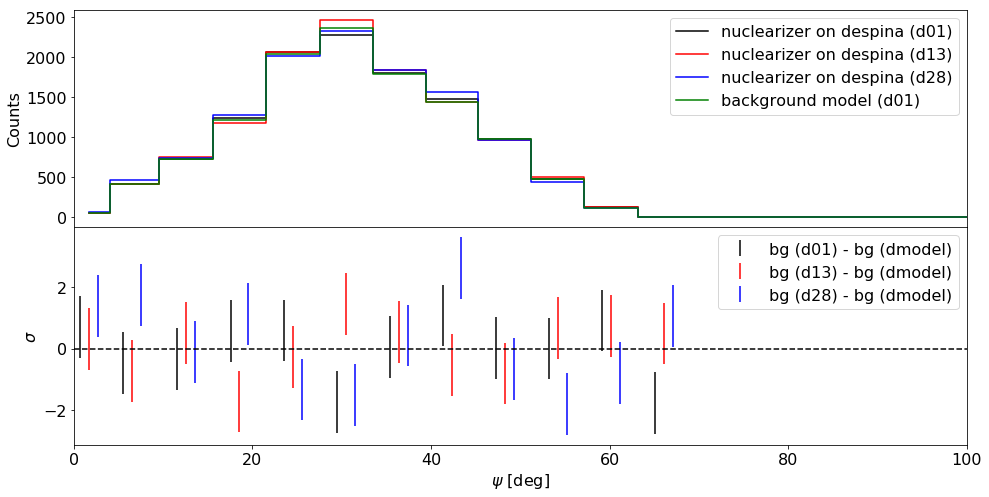

In [44]:
plt.figure(figsize=(16,8))

plt.subplot(211)
plt.step(uniq_bb/deg2rad,analysis_d_01.dataset.psi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d01)')
plt.step(uniq_bb/deg2rad,analysis_d_13.dataset.psi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d13)')
plt.step(uniq_bb/deg2rad,analysis_d_28.dataset.psi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d28)')
plt.step(uniq_bb/deg2rad,bg_dd01_psi_binned[0,ec,:],where='mid',label='background model (d01)')
plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,100)
plt.legend()

plt.subplot(212)

plt.errorbar(uniq_bb/deg2rad-1,(analysis_d_01.dataset.psi_binned[0,ec,:]-bg_dd01_psi_binned[0,ec,:])/\
             np.sqrt(bg_dd01_psi_binned[0,ec,:]),
             yerr=np.ones(len(uniq_bb)),label='bg (d01) - bg (dmodel)',linestyle='')
plt.errorbar(uniq_bb/deg2rad,(analysis_d_13.dataset.psi_binned[0,ec,:]-bg_dd13_psi_binned[0,ec,:])/\
             np.sqrt(bg_dd13_psi_binned[0,ec,:]),
             yerr=np.ones(len(uniq_bb)),label='bg (d13) - bg (dmodel)',linestyle='')
plt.errorbar(uniq_bb/deg2rad+1,(analysis_d_28.dataset.psi_binned[0,ec,:]-bg_dd28_psi_binned[0,ec,:])/\
             np.sqrt(bg_dd28_psi_binned[0,ec,:]),
             yerr=np.ones(len(uniq_bb)),label='bg (d28) - bg (dmodel)',linestyle='')

plt.axhline(0,linestyle='--')
plt.xlim(0,100)
plt.xlabel(r'$\psi$ [deg]')
plt.ylabel(r'$\sigma$')
plt.legend()

plt.subplots_adjust(hspace=0)

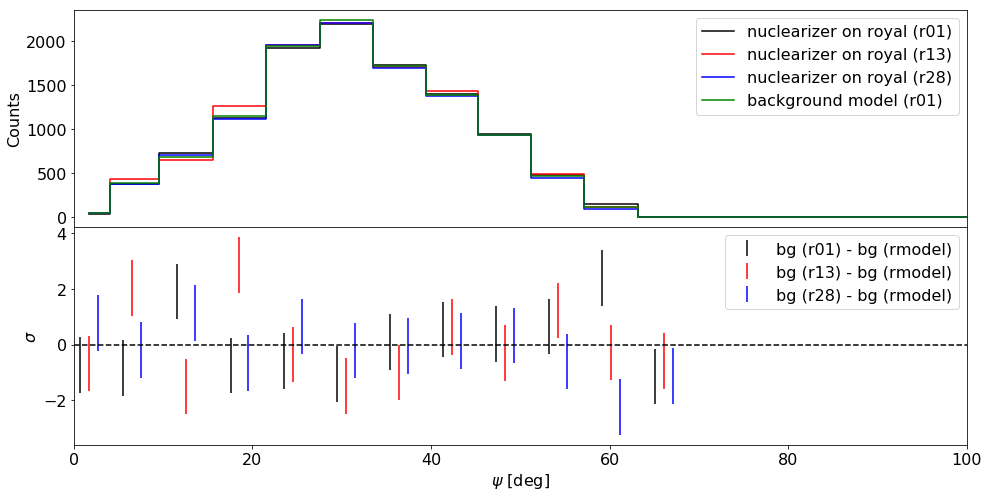

In [45]:
plt.figure(figsize=(16,8))

plt.subplot(211)
plt.step(uniq_bb/deg2rad,analysis_r_01.dataset.psi_binned[0,ec,:],where='mid',label='nuclearizer on royal (r01)')
plt.step(uniq_bb/deg2rad,analysis_r_13.dataset.psi_binned[0,ec,:],where='mid',label='nuclearizer on royal (r13)')
plt.step(uniq_bb/deg2rad,analysis_r_28.dataset.psi_binned[0,ec,:],where='mid',label='nuclearizer on royal (r28)')
plt.step(uniq_bb/deg2rad,bg_rr01_psi_binned[0,ec,:],where='mid',label='background model (r01)')
plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,100)
plt.legend()

plt.subplot(212)

plt.errorbar(uniq_bb/deg2rad-1,(analysis_r_01.dataset.psi_binned[0,ec,:]-bg_rr01_psi_binned[0,ec,:])/\
             np.sqrt(bg_rr01_psi_binned[0,ec,:]),
             yerr=np.ones(len(uniq_bb)),label='bg (r01) - bg (rmodel)',linestyle='')
plt.errorbar(uniq_bb/deg2rad,(analysis_r_13.dataset.psi_binned[0,ec,:]-bg_rr13_psi_binned[0,ec,:])/\
             np.sqrt(bg_rr13_psi_binned[0,ec,:]),
             yerr=np.ones(len(uniq_bb)),label='bg (r13) - bg (rmodel)',linestyle='')
plt.errorbar(uniq_bb/deg2rad+1,(analysis_r_28.dataset.psi_binned[0,ec,:]-bg_rr28_psi_binned[0,ec,:])/\
             np.sqrt(bg_rr28_psi_binned[0,ec,:]),
             yerr=np.ones(len(uniq_bb)),label='bg (r28) - bg (rmodel)',linestyle='')

plt.axhline(0,linestyle='--')
plt.xlim(0,100)
plt.xlabel(r'$\psi$ [deg]')
plt.ylabel(r'$\sigma$')
plt.legend()

plt.subplots_adjust(hspace=0)

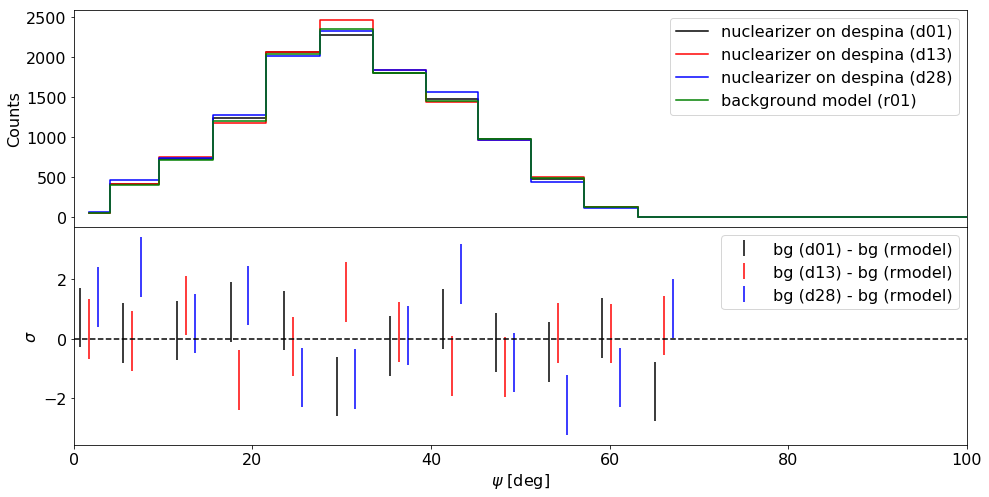

In [46]:
plt.figure(figsize=(16,8))

plt.subplot(211)
plt.step(uniq_bb/deg2rad,analysis_d_01.dataset.psi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d01)')
plt.step(uniq_bb/deg2rad,analysis_d_13.dataset.psi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d13)')
plt.step(uniq_bb/deg2rad,analysis_d_28.dataset.psi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d28)')
plt.step(uniq_bb/deg2rad,bg_dr01_psi_binned[0,ec,:],where='mid',label='background model (r01)')
plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,100)
plt.legend()

plt.subplot(212)

plt.errorbar(uniq_bb/deg2rad-1,(analysis_d_01.dataset.psi_binned[0,ec,:]-bg_dr01_psi_binned[0,ec,:])/\
             np.sqrt(bg_dr01_psi_binned[0,ec,:]),
             yerr=np.ones(len(uniq_bb)),label='bg (d01) - bg (rmodel)',linestyle='')
plt.errorbar(uniq_bb/deg2rad,(analysis_d_13.dataset.psi_binned[0,ec,:]-bg_dr13_psi_binned[0,ec,:])/\
             np.sqrt(bg_dr13_psi_binned[0,ec,:]),
             yerr=np.ones(len(uniq_bb)),label='bg (d13) - bg (rmodel)',linestyle='')
plt.errorbar(uniq_bb/deg2rad+1,(analysis_d_28.dataset.psi_binned[0,ec,:]-bg_dr28_psi_binned[0,ec,:])/\
             np.sqrt(bg_dr28_psi_binned[0,ec,:]),
             yerr=np.ones(len(uniq_bb)),label='bg (d28) - bg (rmodel)',linestyle='')

plt.axhline(0,linestyle='--')
plt.xlim(0,100)
plt.xlabel(r'$\psi$ [deg]')
plt.ylabel(r'$\sigma$')
plt.legend()

plt.subplots_adjust(hspace=0)

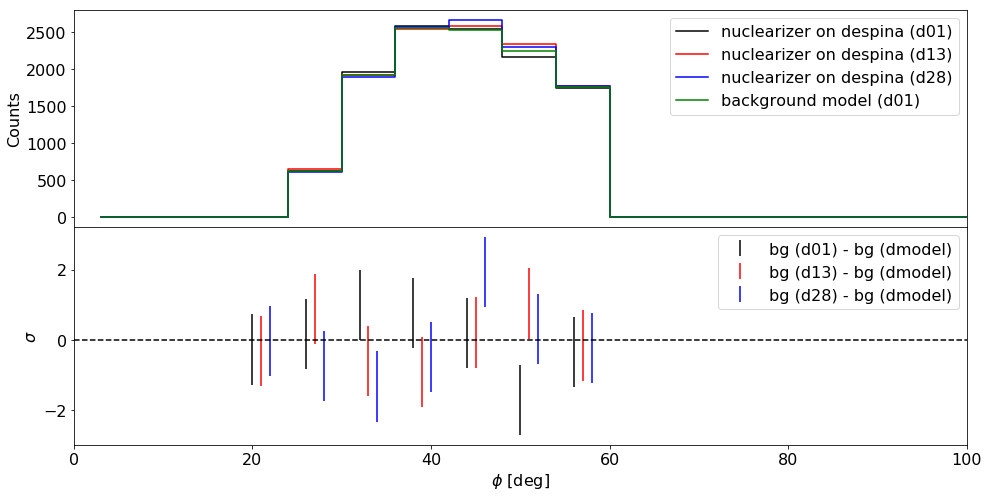

In [48]:
plt.figure(figsize=(16,8))

plt.subplot(211)
plt.step(pp/deg2rad,analysis_d_01.dataset.phi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d01)')
plt.step(pp/deg2rad,analysis_d_13.dataset.phi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d13)')
plt.step(pp/deg2rad,analysis_d_28.dataset.phi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d28)')
plt.step(pp/deg2rad,bg_dd01_phi_binned[0,ec,:],where='mid',label='background model (d01)')
plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,100)
plt.legend()

plt.subplot(212)

plt.errorbar(pp/deg2rad-1,(analysis_d_01.dataset.phi_binned[0,ec,:]-bg_dd01_phi_binned[0,ec,:])/\
             np.sqrt(bg_dd01_phi_binned[0,ec,:]),
             yerr=np.ones(len(pp)),label='bg (d01) - bg (dmodel)',linestyle='')
plt.errorbar(pp/deg2rad,(analysis_d_13.dataset.phi_binned[0,ec,:]-bg_dd13_phi_binned[0,ec,:])/\
             np.sqrt(bg_dd13_phi_binned[0,ec,:]),
             yerr=np.ones(len(pp)),label='bg (d13) - bg (dmodel)',linestyle='')
plt.errorbar(pp/deg2rad+1,(analysis_d_28.dataset.phi_binned[0,ec,:]-bg_dd28_phi_binned[0,ec,:])/\
             np.sqrt(bg_dd28_phi_binned[0,ec,:]),
             yerr=np.ones(len(pp)),label='bg (d28) - bg (dmodel)',linestyle='')

plt.axhline(0,linestyle='--')
plt.xlim(0,100)
plt.xlabel(r'$\phi$ [deg]')
plt.ylabel(r'$\sigma$')
plt.legend()

plt.subplots_adjust(hspace=0)

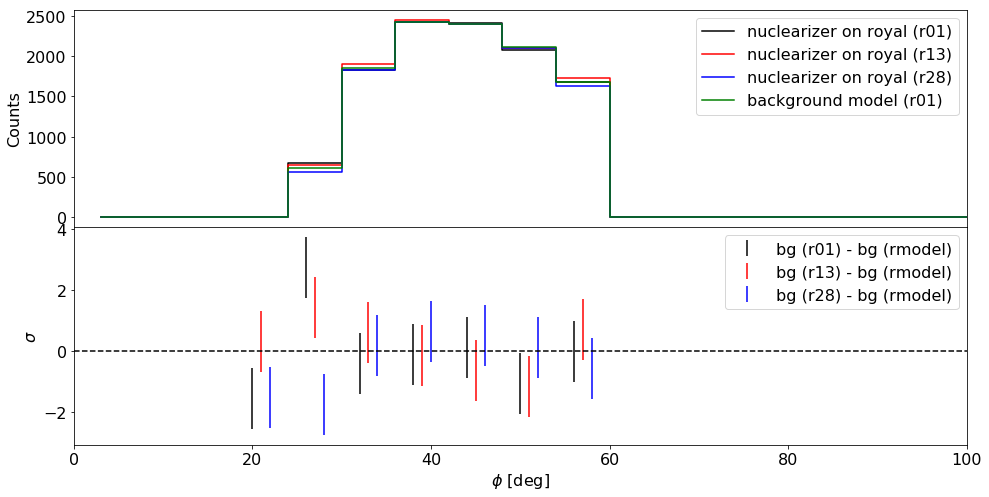

In [49]:
plt.figure(figsize=(16,8))

plt.subplot(211)
plt.step(pp/deg2rad,analysis_r_01.dataset.phi_binned[0,ec,:],where='mid',label='nuclearizer on royal (r01)')
plt.step(pp/deg2rad,analysis_r_13.dataset.phi_binned[0,ec,:],where='mid',label='nuclearizer on royal (r13)')
plt.step(pp/deg2rad,analysis_r_28.dataset.phi_binned[0,ec,:],where='mid',label='nuclearizer on royal (r28)')
plt.step(pp/deg2rad,bg_rr01_phi_binned[0,ec,:],where='mid',label='background model (r01)')
plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,100)
plt.legend()

plt.subplot(212)

plt.errorbar(pp/deg2rad-1,(analysis_r_01.dataset.phi_binned[0,ec,:]-bg_rr01_phi_binned[0,ec,:])/\
             np.sqrt(bg_rr01_phi_binned[0,ec,:]),
             yerr=np.ones(len(pp)),label='bg (r01) - bg (rmodel)',linestyle='')
plt.errorbar(pp/deg2rad,(analysis_r_13.dataset.phi_binned[0,ec,:]-bg_rr13_phi_binned[0,ec,:])/\
             np.sqrt(bg_rr13_phi_binned[0,ec,:]),
             yerr=np.ones(len(pp)),label='bg (r13) - bg (rmodel)',linestyle='')
plt.errorbar(pp/deg2rad+1,(analysis_r_28.dataset.phi_binned[0,ec,:]-bg_rr28_phi_binned[0,ec,:])/\
             np.sqrt(bg_rr28_phi_binned[0,ec,:]),
             yerr=np.ones(len(pp)),label='bg (r28) - bg (rmodel)',linestyle='')

plt.axhline(0,linestyle='--')
plt.xlim(0,100)
plt.xlabel(r'$\phi$ [deg]')
plt.ylabel(r'$\sigma$')
plt.legend()

plt.subplots_adjust(hspace=0)

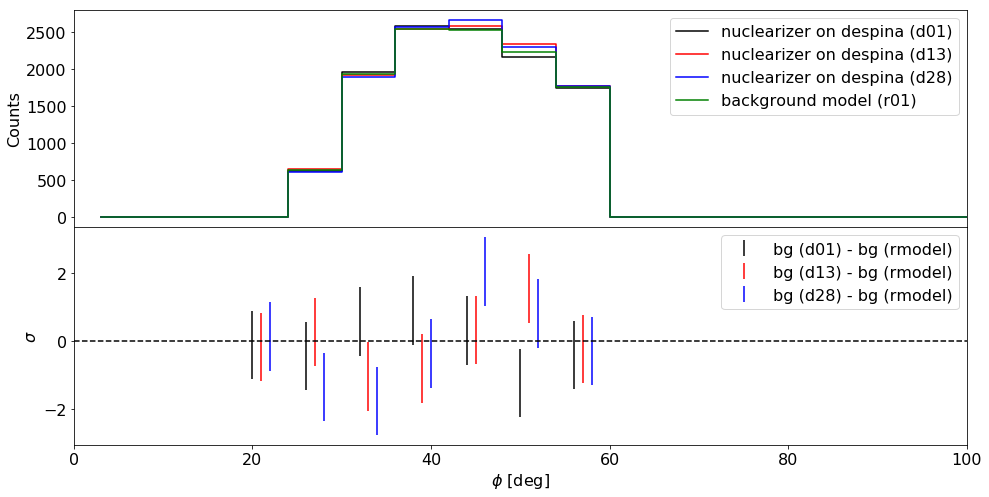

In [50]:
plt.figure(figsize=(16,8))

plt.subplot(211)
plt.step(pp/deg2rad,analysis_d_01.dataset.phi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d01)')
plt.step(pp/deg2rad,analysis_d_13.dataset.phi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d13)')
plt.step(pp/deg2rad,analysis_d_28.dataset.phi_binned[0,ec,:],where='mid',label='nuclearizer on despina (d28)')
plt.step(pp/deg2rad,bg_dr01_phi_binned[0,ec,:],where='mid',label='background model (r01)')
plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,100)
plt.legend()

plt.subplot(212)

plt.errorbar(pp/deg2rad-1,(analysis_d_01.dataset.phi_binned[0,ec,:]-bg_dr01_phi_binned[0,ec,:])/\
             np.sqrt(bg_dr01_phi_binned[0,ec,:]),
             yerr=np.ones(len(pp)),label='bg (d01) - bg (rmodel)',linestyle='')
plt.errorbar(pp/deg2rad,(analysis_d_13.dataset.phi_binned[0,ec,:]-bg_dr13_phi_binned[0,ec,:])/\
             np.sqrt(bg_dr13_phi_binned[0,ec,:]),
             yerr=np.ones(len(pp)),label='bg (d13) - bg (rmodel)',linestyle='')
plt.errorbar(pp/deg2rad+1,(analysis_d_28.dataset.phi_binned[0,ec,:]-bg_dr28_phi_binned[0,ec,:])/\
             np.sqrt(bg_dr28_phi_binned[0,ec,:]),
             yerr=np.ones(len(pp)),label='bg (d28) - bg (rmodel)',linestyle='')

plt.axhline(0,linestyle='--')
plt.xlim(0,100)
plt.xlabel(r'$\phi$ [deg]')
plt.ylabel(r'$\sigma$')
plt.legend()

plt.subplots_adjust(hspace=0)

In [51]:
import numpy as np

def bin_ndarray(ndarray, new_shape, operation='sum'):
    """
    Bins an ndarray in all axes based on the target shape, by summing or
        averaging.
    Number of output dimensions must match number of input dimensions.
    Example
    -------
    >>> m = np.arange(0,100,1).reshape((10,10))
    >>> n = bin_ndarray(m, new_shape=(5,5), operation='sum')
    >>> print(n)
    [[ 22  30  38  46  54]
     [102 110 118 126 134]
     [182 190 198 206 214]
     [262 270 278 286 294]
     [342 350 358 366 374]]
    """
    if not operation.lower() in ['sum', 'mean', 'average', 'avg']:
        raise ValueError("Operation {} not supported.".format(operation))
    if ndarray.ndim != len(new_shape):
        raise ValueError("Shape mismatch: {} -> {}".format(ndarray.shape,
                                                           new_shape))
    compression_pairs = [(d, c//d) for d, c in zip(new_shape,
                                                   ndarray.shape)]
    flattened = [l for p in compression_pairs for l in p]
    ndarray = ndarray.reshape(flattened)
    for i in range(len(new_shape)):
        if operation.lower() == "sum":
            ndarray = ndarray.sum(-1*(i+1))
        elif operation.lower() in ["mean", "average", "avg"]:
            ndarray = ndarray.mean(-1*(i+1))
    return ndarray

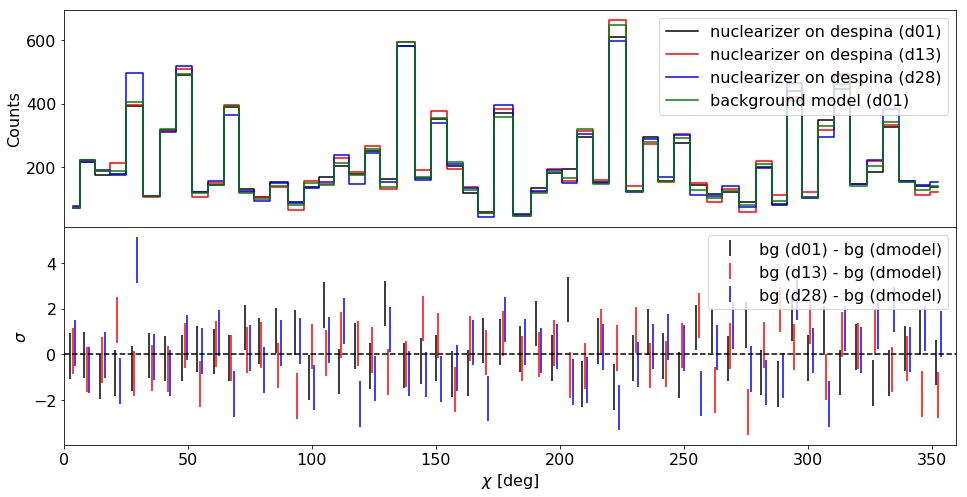

In [54]:
plt.figure(figsize=(16,8))

plt.subplot(211)
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
         bin_ndarray(analysis_d_01.dataset.chi_binned[0,ec,0:550],(55,),operation='sum'),
         where='mid',label='nuclearizer on despina (d01)')
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
         bin_ndarray(analysis_d_13.dataset.chi_binned[0,ec,0:550],(55,),operation='sum'),
         where='mid',label='nuclearizer on despina (d13)')
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
         bin_ndarray(analysis_d_28.dataset.chi_binned[0,ec,0:550],(55,),operation='sum'),
         where='mid',label='nuclearizer on despina (d28)')
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
        bin_ndarray(bg_dd01_chi_binned[0,ec,0:550],(55,),operation='sum'),where='mid',label='background model (d01)')


plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,360)
plt.legend()

plt.subplot(212)

plt.errorbar(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average')-1,
             (bin_ndarray(analysis_d_01.dataset.chi_binned[0,ec,0:550],(55,),operation='sum')-\
              bin_ndarray(bg_dd01_chi_binned[0,ec,0:550],(55,),operation='sum'))/\
             np.sqrt(bin_ndarray(bg_dd01_chi_binned[0,ec,0:550],(55,),operation='sum')),
             yerr=np.ones(55),label='bg (d01) - bg (dmodel)',linestyle='')

plt.errorbar(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
             (bin_ndarray(analysis_d_13.dataset.chi_binned[0,ec,0:550],(55,),operation='sum')-\
              bin_ndarray(bg_dd13_chi_binned[0,ec,0:550],(55,),operation='sum'))/\
             np.sqrt(bin_ndarray(bg_dd13_chi_binned[0,ec,0:550],(55,),operation='sum')),
             yerr=np.ones(55),label='bg (d13) - bg (dmodel)',linestyle='')

plt.errorbar(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average')+1,
             (bin_ndarray(analysis_d_28.dataset.chi_binned[0,ec,0:550],(55,),operation='sum')-\
              bin_ndarray(bg_dd28_chi_binned[0,ec,0:550],(55,),operation='sum'))/\
             np.sqrt(bin_ndarray(bg_dd28_chi_binned[0,ec,0:550],(55,),operation='sum')),
             yerr=np.ones(55),label='bg (d28) - bg (dmodel)',linestyle='')

plt.axhline(0,linestyle='--')
plt.xlim(0,360)
plt.xlabel(r'$\chi$ [deg]')
plt.ylabel(r'$\sigma$')
plt.legend()

plt.subplots_adjust(hspace=0)

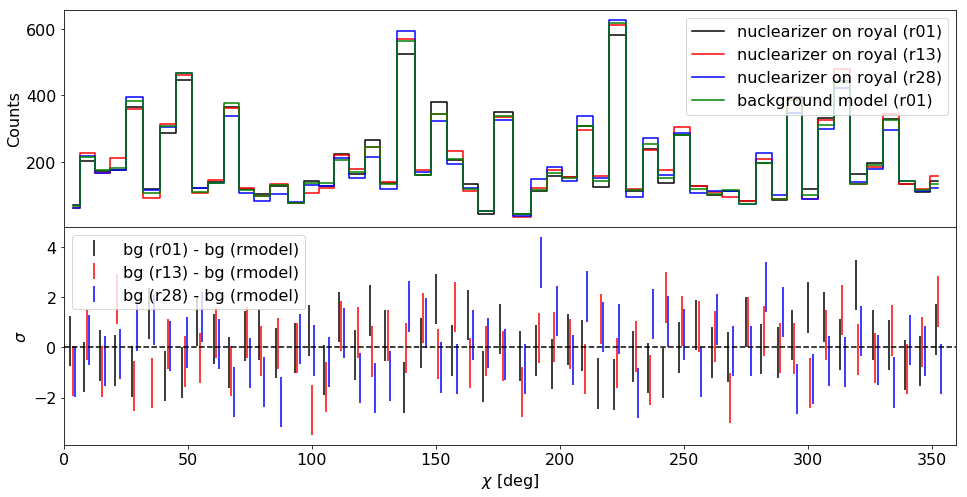

In [57]:
plt.figure(figsize=(16,8))

plt.subplot(211)
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
         bin_ndarray(analysis_r_01.dataset.chi_binned[0,ec,0:550],(55,),operation='sum'),
         where='mid',label='nuclearizer on royal (r01)')
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
         bin_ndarray(analysis_r_13.dataset.chi_binned[0,ec,0:550],(55,),operation='sum'),
         where='mid',label='nuclearizer on royal (r13)')
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
         bin_ndarray(analysis_r_28.dataset.chi_binned[0,ec,0:550],(55,),operation='sum'),
         where='mid',label='nuclearizer on royal (r28)')
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
        bin_ndarray(bg_rr01_chi_binned[0,ec,0:550],(55,),operation='sum'),where='mid',label='background model (r01)')


plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,360)
plt.legend()

plt.subplot(212)

plt.errorbar(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average')-1,
             (bin_ndarray(analysis_r_01.dataset.chi_binned[0,ec,0:550],(55,),operation='sum')-\
              bin_ndarray(bg_rr01_chi_binned[0,ec,0:550],(55,),operation='sum'))/\
             np.sqrt(bin_ndarray(bg_rr01_chi_binned[0,ec,0:550],(55,),operation='sum')),
             yerr=np.ones(55),label='bg (r01) - bg (rmodel)',linestyle='')

plt.errorbar(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
             (bin_ndarray(analysis_r_13.dataset.chi_binned[0,ec,0:550],(55,),operation='sum')-\
              bin_ndarray(bg_rr13_chi_binned[0,ec,0:550],(55,),operation='sum'))/\
             np.sqrt(bin_ndarray(bg_rr13_chi_binned[0,ec,0:550],(55,),operation='sum')),
             yerr=np.ones(55),label='bg (r13) - bg (rmodel)',linestyle='')

plt.errorbar(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average')+1,
             (bin_ndarray(analysis_r_28.dataset.chi_binned[0,ec,0:550],(55,),operation='sum')-\
              bin_ndarray(bg_rr28_chi_binned[0,ec,0:550],(55,),operation='sum'))/\
             np.sqrt(bin_ndarray(bg_rr28_chi_binned[0,ec,0:550],(55,),operation='sum')),
             yerr=np.ones(55),label='bg (r28) - bg (rmodel)',linestyle='')

plt.axhline(0,linestyle='--')
plt.xlim(0,360)
plt.xlabel(r'$\chi$ [deg]')
plt.ylabel(r'$\sigma$')
plt.legend()

plt.subplots_adjust(hspace=0)

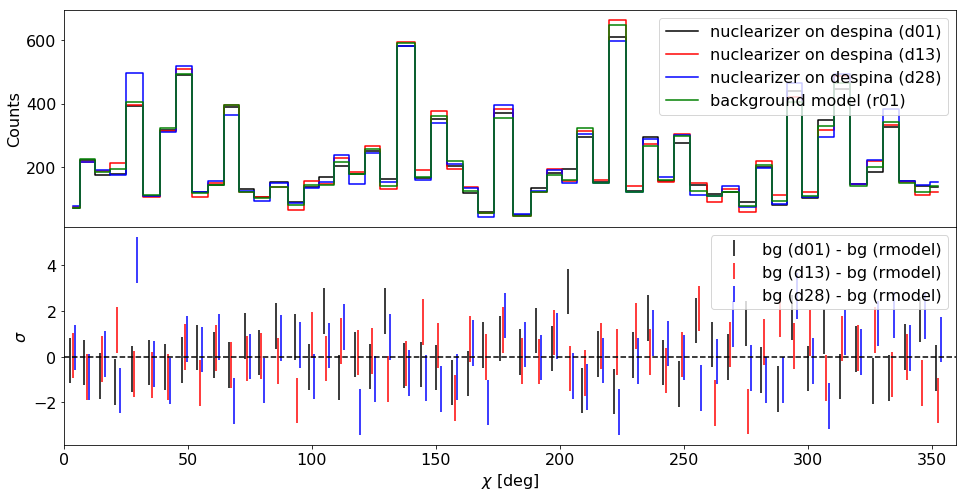

In [58]:
plt.figure(figsize=(16,8))

plt.subplot(211)
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
         bin_ndarray(analysis_d_01.dataset.chi_binned[0,ec,0:550],(55,),operation='sum'),
         where='mid',label='nuclearizer on despina (d01)')
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
         bin_ndarray(analysis_d_13.dataset.chi_binned[0,ec,0:550],(55,),operation='sum'),
         where='mid',label='nuclearizer on despina (d13)')
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
         bin_ndarray(analysis_d_28.dataset.chi_binned[0,ec,0:550],(55,),operation='sum'),
         where='mid',label='nuclearizer on despina (d28)')
plt.step(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
        bin_ndarray(bg_dr01_chi_binned[0,ec,0:550],(55,),operation='sum'),where='mid',label='background model (r01)')


plt.xticks([])
plt.ylabel('Counts')
plt.xlim(0,360)
plt.legend()

plt.subplot(212)

plt.errorbar(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average')-1,
             (bin_ndarray(analysis_d_01.dataset.chi_binned[0,ec,0:550],(55,),operation='sum')-\
              bin_ndarray(bg_dr01_chi_binned[0,ec,0:550],(55,),operation='sum'))/\
             np.sqrt(bin_ndarray(bg_dr01_chi_binned[0,ec,0:550],(55,),operation='sum')),
             yerr=np.ones(55),label='bg (d01) - bg (rmodel)',linestyle='')

plt.errorbar(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average'),
             (bin_ndarray(analysis_d_13.dataset.chi_binned[0,ec,0:550],(55,),operation='sum')-\
              bin_ndarray(bg_dr13_chi_binned[0,ec,0:550],(55,),operation='sum'))/\
             np.sqrt(bin_ndarray(bg_dr13_chi_binned[0,ec,0:550],(55,),operation='sum')),
             yerr=np.ones(55),label='bg (d13) - bg (rmodel)',linestyle='')

plt.errorbar(bin_ndarray(uniq_ll[0:550]/deg2rad,(55,),operation='average')+1,
             (bin_ndarray(analysis_d_28.dataset.chi_binned[0,ec,0:550],(55,),operation='sum')-\
              bin_ndarray(bg_dr28_chi_binned[0,ec,0:550],(55,),operation='sum'))/\
             np.sqrt(bin_ndarray(bg_dr28_chi_binned[0,ec,0:550],(55,),operation='sum')),
             yerr=np.ones(55),label='bg (d28) - bg (rmodel)',linestyle='')

plt.axhline(0,linestyle='--')
plt.xlim(0,360)
plt.xlabel(r'$\chi$ [deg]')
plt.ylabel(r'$\sigma$')
plt.legend()

plt.subplots_adjust(hspace=0)

In [60]:
l1, b1 = 180, 0

In [99]:
rsp.calculate_PS_response(analysis_d_01.dataset,
                          pointing_d_01,l1,b1,1,
                          background=background_dd_01,
                          pixel_size=pixel_size,reduced=True)

Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...



Done.

Calculating averaged RMF for object at (l,b) = (180.0,0.0)


In [96]:
dd_cds_bins = np.array([rsp.sky_response[i].shape[1] for i in range(10)])

In [98]:
dr_cds_bins = np.array([rsp.sky_response[i].shape[1] for i in range(10)])

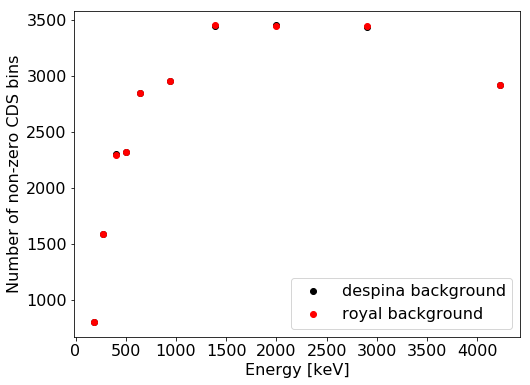

In [109]:
plt.plot(analysis_d_01.dataset.energies.energy_bin_cen,dd_cds_bins,'o',label='despina background')
plt.plot(analysis_d_01.dataset.energies.energy_bin_cen,dr_cds_bins,'o',label='royal background')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of non-zero CDS bins')
plt.legend()

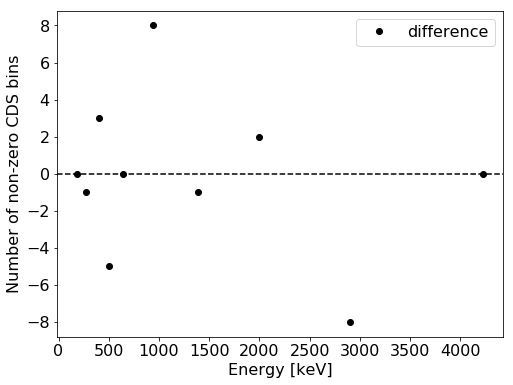

In [110]:
plt.plot(analysis_d_01.dataset.energies.energy_bin_cen,dd_cds_bins-dr_cds_bins,'o',label='difference')
plt.axhline(0,linestyle='--')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of non-zero CDS bins')
plt.legend()

In [63]:
result_d_01 = fit(analysis_d_01.dataset,
                  pointing_d_01,
                  rsp,
                  background=background_dd_01,
                  priors=np.array([[0,1e8],[1,1e4]]),verbose=True)

In [64]:
result_d_01.MAP_solution(scipy=False)

Start optimising energy bin 1/10...

Energy range: 150-220 keV ...
Start optimising energy bin 2/10...

Energy range: 220-325 keV ...
Start optimising energy bin 3/10...

Energy range: 325-480 keV ...
Start optimising energy bin 4/10...

Energy range: 480-520 keV ...
Start optimising energy bin 5/10...

Energy range: 520-765 keV ...
Start optimising energy bin 6/10...

Energy range: 765-1120 keV ...
Start optimising energy bin 7/10...

Energy range: 1120-1650 keV ...
Start optimising energy bin 8/10...

Energy range: 1650-2350 keV ...
Start optimising energy bin 9/10...

Energy range: 2350-3450 keV ...
Start optimising energy bin 10/10...

Energy range: 3450-5000 keV ...

Initial log joint probability = 2215.91
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       7       2219.84    0.00186556     0.0106274           1           1       13   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tole

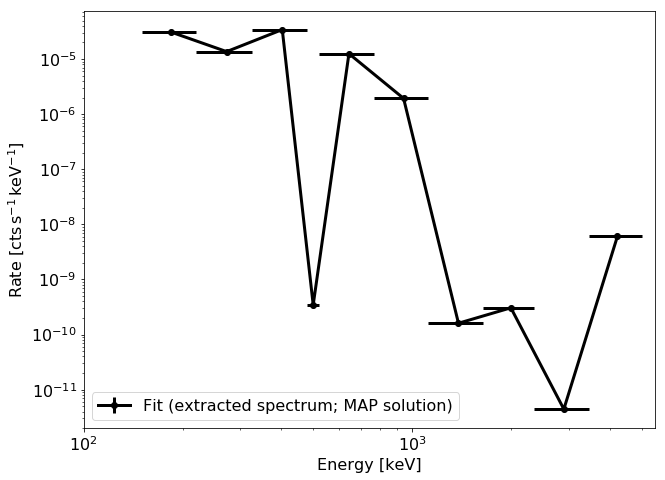

In [66]:
# fit
result_d_01.plot_MAP_spectrum()
plt.legend()

In [67]:
result_d_01.fit(iters=1000,pars=['Abg','flux','model_values','model_sky','model_bg','model_tot'])

###################################################################

Start fitting energy bin 1/10...

Energy range: 150-220 keV ...
Summary for energy bin 1/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 203.06    8.56 108.36  17.61 116.39 196.05 278.41 413.43    160    1.0
Abg[1]    0.91  4.2e-3   0.05    0.8   0.87   0.91   0.95    1.0    159    1.0

Samples were drawn using NUTS at Tue Jan 12 12:31:43 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 2/10...

Energy range: 220-32

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 2/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 337.41   55.75 288.58   14.5 121.92 254.79 470.81 1083.8     27   1.04
Abg[1]    0.97  5.1e-3   0.03   0.91   0.96   0.98   0.99   1.01     27   1.04

Samples were drawn using NUTS at Tue Jan 12 12:31:45 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 3/10...

Energy range: 325-480 keV ...
Summary for energy bin 3/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with it

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)



###################################################################

Start fitting energy bin 4/10...

Energy range: 480-520 keV ...
Summary for energy bin 4/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 126.56    14.3  93.56   6.14  51.21 108.41 179.63  397.8     43    1.0
Abg[1]    0.98  2.9e-3   0.02   0.93   0.97   0.98   0.99   1.02     50    1.0

Samples were drawn using NUTS at Tue Jan 12 12:31:51 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 5/10...

Energy range: 520-7

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 5/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 426.92   36.06  289.6  15.83 209.28 361.57 607.68 1077.9     65    1.0
Abg[1]    0.98  1.6e-3   0.01   0.96   0.98   0.99   0.99   1.01     60   1.01

Samples were drawn using NUTS at Tue Jan 12 12:31:56 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 6/10...

Energy range: 765-1120 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 6/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 255.12   14.22 176.83  18.37 117.94 224.46 359.66  699.1    155    1.0
Abg[1]    0.99  7.0e-4 9.3e-3   0.97   0.98   0.99    1.0   1.01    178    1.0

Samples were drawn using NUTS at Tue Jan 12 12:32:01 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 7/10...

Energy range: 1120-1650 keV ...
Summary for energy bin 7/10:



To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]  75.57    4.94  68.82   3.76  24.39  54.04 102.86 256.57    194   1.02
Abg[1]     1.0  4.2e-4 6.6e-3   0.98   0.99    1.0    1.0   1.01    244    1.0

Samples were drawn using NUTS at Tue Jan 12 12:32:06 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 8/10...

Energy range: 1650-2350 keV ...
Summary for energy bin 8/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1;

To run all diagnostics call pystan.check_hmc_diagnostics(fit)



###################################################################
###################################################################

Start fitting energy bin 9/10...

Energy range: 2350-3450 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 9/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]  34.07    2.23  28.13   1.29  12.73  26.97  48.96 106.15    159    1.0
Abg[1]    0.99  1.2e-3   0.02   0.95   0.98   0.99   1.01   1.03    218    1.0

Samples were drawn using NUTS at Tue Jan 12 12:32:13 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 10/10...

Energy range: 3450-5000 keV ...
Summary for energy bin 10/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each wit

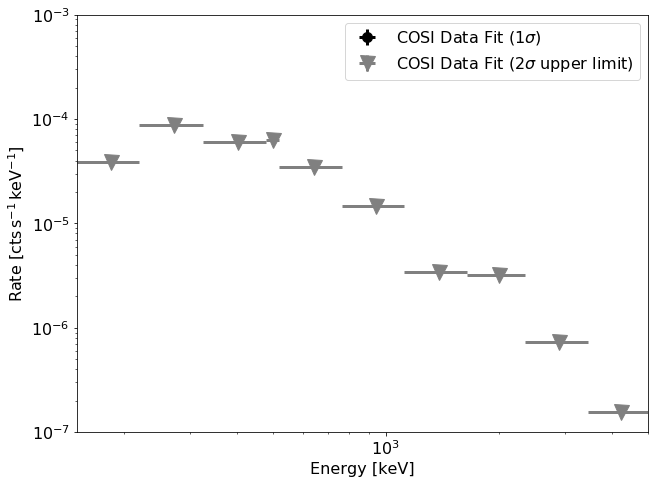

In [81]:
# fit
result_d_01.plot_extracted_spectrum(ul=2)
#pc.set_yscale('linear')

plt.xlim(150,5000)
plt.ylim(1e-7,1e-3)
#plt.yscale('linear')
plt.legend()

In [71]:
rsp.calculate_PS_response(analysis_r_01.dataset,
                          pointing_r_01,l1,b1,1,
                          background=background_rr_01,
                          pixel_size=pixel_size,reduced=True)

Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...



Done.

Calculating averaged RMF for object at (l,b) = (180.0,0.0)


In [72]:
result_r_01 = fit(analysis_r_01.dataset,
                  pointing_r_01,
                  rsp,
                  background=background_rr_01,
                  priors=np.array([[0,1e8],[1,1e4]]),verbose=True)

In [73]:
result_r_01.fit(iters=1000,pars=['Abg','flux','model_values','model_sky','model_bg','model_tot'])

###################################################################

Start fitting energy bin 1/10...

Energy range: 150-220 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 1/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]  31.68    3.72  30.15   0.56   10.9  24.12  43.34 117.81     66   1.06
Abg[1]    0.99  2.8e-3   0.02   0.92   0.97   0.99    1.0   1.03     77   1.03

Samples were drawn using NUTS at Tue Jan 12 12:33:41 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 2/10...

Energy range: 220-325 keV ...
Summary for energy bin 2/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with it

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 3/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]  530.4   30.72 317.41  15.76 294.94 492.92 741.35 1266.4    107   1.04
Abg[1]    0.97  1.6e-3   0.02   0.94   0.96   0.98   0.99    1.0    105   1.04

Samples were drawn using NUTS at Tue Jan 12 12:33:48 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 4/10...

Energy range: 480-520 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 4/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 245.97   17.99 172.76   6.94   92.4 217.67 380.03 615.72     92    1.0
Abg[1]    0.96  3.1e-3   0.03    0.9   0.93   0.96   0.98   1.01    103    1.0

Samples were drawn using NUTS at Tue Jan 12 12:33:50 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 5/10...

Energy range: 520-765 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 5/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 333.19    31.5 239.06  15.62 132.28 279.47 501.36  851.8     58    1.0
Abg[1]    0.99  1.5e-3   0.01   0.96   0.98   0.99    1.0   1.01     62    1.0

Samples were drawn using NUTS at Tue Jan 12 12:33:55 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 6/10...

Energy range: 765-1120 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 6/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]  175.6   13.31 145.49   8.51  57.47 132.81 259.35 544.12    119    1.0
Abg[1]    0.99  6.9e-4 8.6e-3   0.97   0.99   0.99    1.0   1.01    158    1.0

Samples were drawn using NUTS at Tue Jan 12 12:33:59 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 7/10...

Energy range: 1120-1650 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 7/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 235.47   13.52 167.64  12.33  95.49 212.83 342.24 635.39    154    1.0
Abg[1]    0.99  6.1e-4 8.6e-3   0.97   0.99   0.99    1.0   1.01    199    1.0

Samples were drawn using NUTS at Tue Jan 12 12:34:04 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 8/10...

Energy range: 1650-2350 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 8/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]  93.72    4.93  75.66   4.92  37.26  72.43 130.72 294.08    236    1.0
Abg[1]    0.99  5.6e-4 9.7e-3   0.97   0.99   0.99    1.0   1.01    306   1.01

Samples were drawn using NUTS at Tue Jan 12 12:34:08 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 9/10...

Energy range: 2350-3450 keV ...
Summary for energy bin 9/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with 

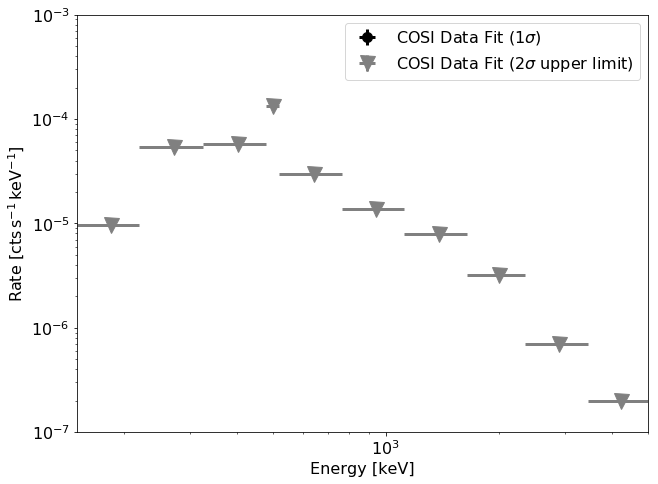

In [80]:
# fit
result_r_01.plot_extracted_spectrum(ul=2)
#pc.set_yscale('linear')

plt.xlim(150,5000)
plt.ylim(1e-7,1e-3)
#plt.yscale('linear')
plt.legend()

In [75]:
rsp.calculate_PS_response(analysis_d_01.dataset,
                          pointing_d_01,l1,b1,1,
                          background=background_dr_01,
                          pixel_size=pixel_size,reduced=True)

Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...



Done.

Calculating averaged RMF for object at (l,b) = (180.0,0.0)


In [76]:
result_dr_01 = fit(analysis_d_01.dataset,
                  pointing_d_01,
                  rsp,
                  background=background_dr_01,
                  priors=np.array([[0,1e8],[1,1e4]]),verbose=True)

In [77]:
result_dr_01.fit(iters=1000,pars=['Abg','flux','model_values','model_sky','model_bg','model_tot'])

###################################################################

Start fitting energy bin 1/10...

Energy range: 150-220 keV ...
Summary for energy bin 1/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 300.12   14.42 137.23  56.92 213.46 288.81 374.95 617.63     91    1.0
Abg[1]    0.86  7.1e-3   0.07   0.69   0.82   0.86    0.9   0.98     91    1.0

Samples were drawn using NUTS at Tue Jan 12 12:35:37 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


###################################################################
###################################################################

Start fitting energy bin 2/10...

Energy range: 220-325 keV ...
Summary for energy bin 2/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 467.84   37.85 291.27  46.12 212.37 436.69 673.79 1066.2     59   1.01
Abg[1]    0.96  3.5e-3   0.03    0.9   0.94   0.96   0.98    1.0     59   1.02

Samples were drawn using NUTS at Tue Jan 12 12:35:40 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
#######################################################

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 1479.6   66.09 573.12 264.05 1101.6 1475.9 1792.4 2782.2     75    1.0
Abg[1]    0.93  3.0e-3   0.03   0.87   0.92   0.93   0.95   0.99     76    1.0

Samples were drawn using NUTS at Tue Jan 12 12:35:44 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 4/10...

Energy range: 480-520 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 4/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 329.07   37.29 205.44  10.68 162.93 302.95 459.86 793.34     30    1.0
Abg[1]    0.95  6.1e-3   0.03   0.88   0.92   0.95   0.98   1.01     31    1.0

Samples were drawn using NUTS at Tue Jan 12 12:35:47 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 5/10...

Energy range: 520-765 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 5/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 1014.1   33.88 352.58 418.29 757.48 1012.2 1247.8 1799.5    108    1.0
Abg[1]    0.96  1.3e-3   0.01   0.93   0.95   0.96   0.97   0.99    113    1.0

Samples were drawn using NUTS at Tue Jan 12 12:35:51 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 6/10...

Energy range: 765-1120 keV ...
Summary for energy bin 6/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with i

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 7/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 106.08    7.19  96.35   1.07  36.66  78.83 147.49  363.2    180   1.01
Abg[1]     1.0  4.6e-4 6.7e-3   0.98   0.99    1.0    1.0   1.01    210    1.0

Samples were drawn using NUTS at Tue Jan 12 12:36:00 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 8/10...

Energy range: 1650-2350 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 8/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 223.61   13.86 136.39   7.92  119.6  212.1 312.72 538.44     97    1.0
Abg[1]    0.98  1.5e-3   0.01   0.95   0.98   0.99    1.0   1.01     88   1.01

Samples were drawn using NUTS at Tue Jan 12 12:36:04 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 9/10...

Energy range: 2350-3450 keV ...
Summary for energy bin 9/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with 

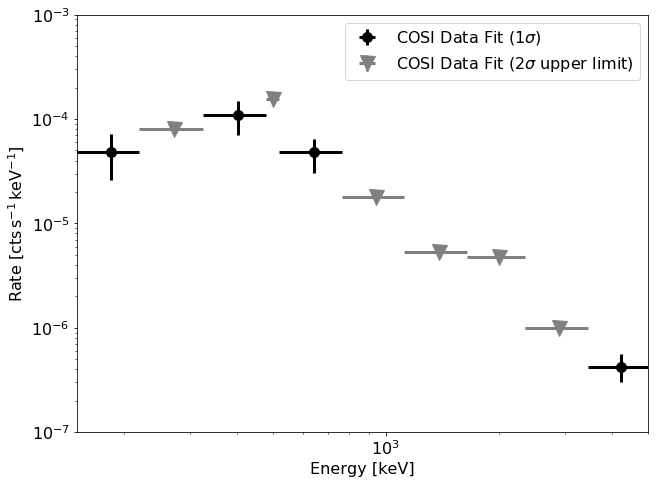

In [79]:
# fit
result_dr_01.plot_extracted_spectrum(ul=2)
#pc.set_yscale('linear')

plt.xlim(150,5000)
plt.ylim(1e-7,1e-3)
#plt.yscale('linear')
plt.legend()

In [82]:
rsp.calculate_PS_response(analysis_r_01.dataset,
                          pointing_r_01,l1,b1,1,
                          background=background_rd_01,
                          pixel_size=pixel_size,reduced=True)

Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...



Done.

Calculating averaged RMF for object at (l,b) = (180.0,0.0)


In [83]:
result_rd_01 = fit(analysis_r_01.dataset,
                  pointing_r_01,
                  rsp,
                  background=background_rd_01,
                  priors=np.array([[0,1e8],[1,1e4]]),verbose=True)

In [84]:
result_rd_01.fit(iters=1000,pars=['Abg','flux','model_values','model_sky','model_bg','model_tot'])

###################################################################

Start fitting energy bin 1/10...

Energy range: 150-220 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 1/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]  53.79    8.36  52.59   1.92  13.95  36.61  75.46 191.08     40    1.0
Abg[1]    0.97  5.9e-3   0.04   0.88   0.96   0.98    1.0   1.03     37    1.0

Samples were drawn using NUTS at Tue Jan 12 12:37:22 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 2/10...

Energy range: 220-325 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 2/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 971.76   37.08 387.95 306.78 697.41 955.45 1221.7 1756.1    109    1.0
Abg[1]    0.91  3.5e-3   0.04   0.84   0.89   0.91   0.94   0.98    106    1.0

Samples were drawn using NUTS at Tue Jan 12 12:37:25 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 3/10...

Energy range: 325-480 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 3/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 1195.7   46.78 485.81 334.44 841.06 1153.2 1529.5 2144.3    108    1.0
Abg[1]    0.94  2.3e-3   0.02    0.9   0.93   0.94   0.96   0.99    103    1.0

Samples were drawn using NUTS at Tue Jan 12 12:37:28 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 4/10...

Energy range: 480-520 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 4/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 584.81   25.36 242.54  47.49 427.64 594.41  745.1 1029.2     91    1.0
Abg[1]     0.9  4.5e-3   0.04   0.81   0.87    0.9   0.93   0.99     90    1.0

Samples were drawn using NUTS at Tue Jan 12 12:37:31 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 5/10...

Energy range: 520-765 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 5/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 424.17   22.09 262.66  14.17 213.39 392.67 603.75 949.27    141    1.0
Abg[1]    0.98  1.0e-3   0.01   0.96   0.98   0.98   0.99    1.0    128    1.0

Samples were drawn using NUTS at Tue Jan 12 12:37:36 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 6/10...

Energy range: 765-1120 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 6/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]  253.7   20.09 196.68  16.73  89.86 184.98 376.73 702.12     96    1.0
Abg[1]    0.99  1.1e-3 9.9e-3   0.97   0.98   0.99    1.0   1.01     86    1.0

Samples were drawn using NUTS at Tue Jan 12 12:37:41 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 7/10...

Energy range: 1120-1650 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 7/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 397.32   24.31 207.84  16.14 247.77 393.33 522.88 812.69     73   1.04
Abg[1]    0.98  1.2e-3   0.01   0.96   0.98   0.98   0.99    1.0     78   1.03

Samples were drawn using NUTS at Tue Jan 12 12:37:46 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 8/10...

Energy range: 1650-2350 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 8/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 145.88    8.65  95.21   6.04  71.97 132.91 209.03 357.88    121   1.04
Abg[1]    0.99  9.5e-4   0.01   0.97   0.98   0.99    1.0   1.01    145   1.05

Samples were drawn using NUTS at Tue Jan 12 12:37:50 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 9/10...

Energy range: 2350-3450 keV ...


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Summary for energy bin 9/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]  51.51    2.19  36.75   3.42  21.91  44.49  69.84 140.09    281    1.0
Abg[1]    0.99  1.0e-3   0.02   0.95   0.97   0.99    1.0   1.02    290    1.0

Samples were drawn using NUTS at Tue Jan 12 12:37:54 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 10/10...

Energy range: 3450-5000 keV ...
Summary for energy bin 10/10:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each wit

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: poisson_lpmf: Rate parameter[1] is nan, but must not be nan!  (in 'COSImodfit.stan' at line 80)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



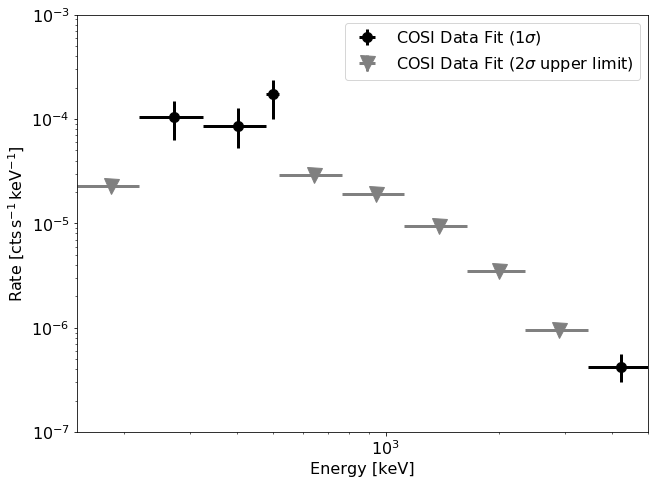

In [85]:
# fit
result_rd_01.plot_extracted_spectrum(ul=2)
#pc.set_yscale('linear')

plt.xlim(150,5000)
plt.ylim(1e-7,1e-3)
#plt.yscale('linear')
plt.legend()

In [86]:
l_gridg = np.linspace(180-75,180+75,14)
b_gridg = np.linspace(0-75,0+75,14)

l_grid = l_gridg[0:-1]+np.diff(l_gridg[0:-1])[0]/2
b_grid = b_gridg[0:-1]+np.diff(b_gridg[0:-1])[0]/2

l_grid[l_grid<-180] += 360

L_GRIDg, B_GRIDg = np.meshgrid(l_gridg,b_gridg)
L_GRID, B_GRID = np.meshgrid(l_grid,b_grid)

In [87]:
pointing_d_01.zpoins[0,0],pointing_d_01.zpoins[0,1],

(180.0, 0.0)

In [88]:
result_d_01.TS_map([L_GRID,B_GRID],scipy=True)

Fitting background only...


Now fitting object at (l,b) = (110.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-69.2)


Now fitting object at (l,b) = (122.3,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-69.2)


Now fitting object at (l,b) = (133.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-69.2)


Now fitting object at (l,b) = (145.4,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-69.2)


Now fitting object at (l,b) = (156.9,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-69.2)


Now fitting object at (l,b) = (168.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-69.2)


Now fitting object at (l,b) = (180.0,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-69.2)


Now fitting object at (l,b) = (191.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-69.2)


Now fitting object at (l,b) = (203.1,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-69.2)


Now fitting object at (l,b) = (214.6,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-69.2)


Now fitting object at (l,b) = (226.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-69.2)


Now fitting object at (l,b) = (237.7,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-69.2)


Now fitting object at (l,b) = (249.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-69.2)


Now fitting object at (l,b) = (110.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-57.7)


Now fitting object at (l,b) = (122.3,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-57.7)


Now fitting object at (l,b) = (133.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-57.7)


Now fitting object at (l,b) = (145.4,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-57.7)


Now fitting object at (l,b) = (156.9,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-57.7)


Now fitting object at (l,b) = (168.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-57.7)


Now fitting object at (l,b) = (180.0,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-57.7)


Now fitting object at (l,b) = (191.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-57.7)


Now fitting object at (l,b) = (203.1,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-57.7)


Now fitting object at (l,b) = (214.6,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-57.7)


Now fitting object at (l,b) = (226.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-57.7)


Now fitting object at (l,b) = (237.7,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-57.7)


Now fitting object at (l,b) = (249.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-57.7)


Now fitting object at (l,b) = (110.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-46.2)


Now fitting object at (l,b) = (122.3,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-46.2)


Now fitting object at (l,b) = (133.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-46.2)


Now fitting object at (l,b) = (145.4,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-46.2)


Now fitting object at (l,b) = (156.9,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-46.2)


Now fitting object at (l,b) = (168.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-46.2)


Now fitting object at (l,b) = (180.0,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-46.2)


Now fitting object at (l,b) = (191.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-46.2)


Now fitting object at (l,b) = (203.1,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-46.2)


Now fitting object at (l,b) = (214.6,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-46.2)


Now fitting object at (l,b) = (226.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-46.2)


Now fitting object at (l,b) = (237.7,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-46.2)


Now fitting object at (l,b) = (249.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-46.2)


Now fitting object at (l,b) = (110.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-34.6)


Now fitting object at (l,b) = (122.3,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-34.6)


Now fitting object at (l,b) = (133.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-34.6)


Now fitting object at (l,b) = (145.4,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-34.6)


Now fitting object at (l,b) = (156.9,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-34.6)


Now fitting object at (l,b) = (168.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-34.6)


Now fitting object at (l,b) = (180.0,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-34.6)


Now fitting object at (l,b) = (191.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-34.6)


Now fitting object at (l,b) = (203.1,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-34.6)


Now fitting object at (l,b) = (214.6,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-34.6)


Now fitting object at (l,b) = (226.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-34.6)


Now fitting object at (l,b) = (237.7,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-34.6)


Now fitting object at (l,b) = (249.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-34.6)


Now fitting object at (l,b) = (110.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-23.1)


Now fitting object at (l,b) = (122.3,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-23.1)


Now fitting object at (l,b) = (133.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-23.1)


Now fitting object at (l,b) = (145.4,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-23.1)


Now fitting object at (l,b) = (156.9,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-23.1)


Now fitting object at (l,b) = (168.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-23.1)


Now fitting object at (l,b) = (180.0,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-23.1)


Now fitting object at (l,b) = (191.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-23.1)


Now fitting object at (l,b) = (203.1,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-23.1)


Now fitting object at (l,b) = (214.6,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-23.1)


Now fitting object at (l,b) = (226.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-23.1)


Now fitting object at (l,b) = (237.7,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-23.1)


Now fitting object at (l,b) = (249.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-23.1)


Now fitting object at (l,b) = (110.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-11.5)


Now fitting object at (l,b) = (122.3,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-11.5)


Now fitting object at (l,b) = (133.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-11.5)


Now fitting object at (l,b) = (145.4,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-11.5)


Now fitting object at (l,b) = (156.9,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-11.5)


Now fitting object at (l,b) = (168.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-11.5)


Now fitting object at (l,b) = (180.0,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-11.5)


Now fitting object at (l,b) = (191.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-11.5)


Now fitting object at (l,b) = (203.1,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-11.5)


Now fitting object at (l,b) = (214.6,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-11.5)


Now fitting object at (l,b) = (226.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-11.5)


Now fitting object at (l,b) = (237.7,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-11.5)


Now fitting object at (l,b) = (249.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-11.5)


Now fitting object at (l,b) = (110.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-0.0)


Now fitting object at (l,b) = (122.3,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-0.0)


Now fitting object at (l,b) = (133.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-0.0)


Now fitting object at (l,b) = (145.4,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-0.0)


Now fitting object at (l,b) = (156.9,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-0.0)


Now fitting object at (l,b) = (168.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-0.0)


Now fitting object at (l,b) = (180.0,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-0.0)


Now fitting object at (l,b) = (191.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-0.0)


Now fitting object at (l,b) = (203.1,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-0.0)


Now fitting object at (l,b) = (214.6,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-0.0)


Now fitting object at (l,b) = (226.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-0.0)


Now fitting object at (l,b) = (237.7,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-0.0)


Now fitting object at (l,b) = (249.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-0.0)


Now fitting object at (l,b) = (110.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,11.5)


Now fitting object at (l,b) = (122.3,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,11.5)


Now fitting object at (l,b) = (133.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,11.5)


Now fitting object at (l,b) = (145.4,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,11.5)


Now fitting object at (l,b) = (156.9,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,11.5)


Now fitting object at (l,b) = (168.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,11.5)


Now fitting object at (l,b) = (180.0,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,11.5)


Now fitting object at (l,b) = (191.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,11.5)


Now fitting object at (l,b) = (203.1,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,11.5)


Now fitting object at (l,b) = (214.6,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,11.5)


Now fitting object at (l,b) = (226.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,11.5)


Now fitting object at (l,b) = (237.7,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,11.5)


Now fitting object at (l,b) = (249.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,11.5)


Now fitting object at (l,b) = (110.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,23.1)


Now fitting object at (l,b) = (122.3,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,23.1)


Now fitting object at (l,b) = (133.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,23.1)


Now fitting object at (l,b) = (145.4,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,23.1)


Now fitting object at (l,b) = (156.9,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,23.1)


Now fitting object at (l,b) = (168.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,23.1)


Now fitting object at (l,b) = (180.0,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,23.1)


Now fitting object at (l,b) = (191.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,23.1)


Now fitting object at (l,b) = (203.1,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,23.1)


Now fitting object at (l,b) = (214.6,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,23.1)


Now fitting object at (l,b) = (226.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,23.1)


Now fitting object at (l,b) = (237.7,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,23.1)


Now fitting object at (l,b) = (249.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,23.1)


Now fitting object at (l,b) = (110.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,34.6)


Now fitting object at (l,b) = (122.3,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,34.6)


Now fitting object at (l,b) = (133.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,34.6)


Now fitting object at (l,b) = (145.4,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,34.6)


Now fitting object at (l,b) = (156.9,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,34.6)


Now fitting object at (l,b) = (168.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,34.6)


Now fitting object at (l,b) = (180.0,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,34.6)


Now fitting object at (l,b) = (191.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,34.6)


Now fitting object at (l,b) = (203.1,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,34.6)


Now fitting object at (l,b) = (214.6,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,34.6)


Now fitting object at (l,b) = (226.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,34.6)


Now fitting object at (l,b) = (237.7,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,34.6)


Now fitting object at (l,b) = (249.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,34.6)


Now fitting object at (l,b) = (110.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,46.2)


Now fitting object at (l,b) = (122.3,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,46.2)


Now fitting object at (l,b) = (133.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,46.2)


Now fitting object at (l,b) = (145.4,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,46.2)


Now fitting object at (l,b) = (156.9,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,46.2)


Now fitting object at (l,b) = (168.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,46.2)


Now fitting object at (l,b) = (180.0,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,46.2)


Now fitting object at (l,b) = (191.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,46.2)


Now fitting object at (l,b) = (203.1,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,46.2)


Now fitting object at (l,b) = (214.6,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,46.2)


Now fitting object at (l,b) = (226.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,46.2)


Now fitting object at (l,b) = (237.7,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,46.2)


Now fitting object at (l,b) = (249.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,46.2)


Now fitting object at (l,b) = (110.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,57.7)


Now fitting object at (l,b) = (122.3,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,57.7)


Now fitting object at (l,b) = (133.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,57.7)


Now fitting object at (l,b) = (145.4,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,57.7)


Now fitting object at (l,b) = (156.9,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,57.7)


Now fitting object at (l,b) = (168.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,57.7)


Now fitting object at (l,b) = (180.0,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,57.7)


Now fitting object at (l,b) = (191.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,57.7)


Now fitting object at (l,b) = (203.1,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,57.7)


Now fitting object at (l,b) = (214.6,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,57.7)


Now fitting object at (l,b) = (226.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,57.7)


Now fitting object at (l,b) = (237.7,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,57.7)


Now fitting object at (l,b) = (249.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,57.7)


Now fitting object at (l,b) = (110.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,69.2)


Now fitting object at (l,b) = (122.3,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,69.2)


Now fitting object at (l,b) = (133.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,69.2)


Now fitting object at (l,b) = (145.4,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,69.2)


Now fitting object at (l,b) = (156.9,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,69.2)


Now fitting object at (l,b) = (168.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,69.2)


Now fitting object at (l,b) = (180.0,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,69.2)


Now fitting object at (l,b) = (191.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,69.2)


Now fitting object at (l,b) = (203.1,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,69.2)


Now fitting object at (l,b) = (214.6,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,69.2)


Now fitting object at (l,b) = (226.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,69.2)


Now fitting object at (l,b) = (237.7,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,69.2)


Now fitting object at (l,b) = (249.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,69.2)


In [112]:
result_r_01.TS_map([L_GRID,B_GRID],scipy=True)

Fitting background only...


Now fitting object at (l,b) = (-249.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-249.2,-69.2)


Now fitting object at (l,b) = (-237.7,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-237.7,-69.2)


Now fitting object at (l,b) = (-226.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-226.2,-69.2)


Now fitting object at (l,b) = (-214.6,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-214.6,-69.2)


Now fitting object at (l,b) = (-203.1,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-203.1,-69.2)


Now fitting object at (l,b) = (-191.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-191.5,-69.2)


Now fitting object at (l,b) = (-180.0,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-180.0,-69.2)


Now fitting object at (l,b) = (-168.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-168.5,-69.2)


Now fitting object at (l,b) = (-156.9,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-156.9,-69.2)


Now fitting object at (l,b) = (-145.4,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-145.4,-69.2)


Now fitting object at (l,b) = (-133.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-133.8,-69.2)


Now fitting object at (l,b) = (-122.3,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-122.3,-69.2)


Now fitting object at (l,b) = (-110.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-110.8,-69.2)


Now fitting object at (l,b) = (110.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-57.7)


Now fitting object at (l,b) = (122.3,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-57.7)


Now fitting object at (l,b) = (133.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-57.7)


Now fitting object at (l,b) = (145.4,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-57.7)


Now fitting object at (l,b) = (156.9,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-57.7)


Now fitting object at (l,b) = (168.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-57.7)


Now fitting object at (l,b) = (180.0,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-57.7)


Now fitting object at (l,b) = (191.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-57.7)


Now fitting object at (l,b) = (203.1,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-57.7)


Now fitting object at (l,b) = (214.6,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-57.7)


Now fitting object at (l,b) = (226.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-57.7)


Now fitting object at (l,b) = (237.7,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-57.7)


Now fitting object at (l,b) = (249.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-57.7)


Now fitting object at (l,b) = (110.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-46.2)


Now fitting object at (l,b) = (122.3,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-46.2)


Now fitting object at (l,b) = (133.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-46.2)


Now fitting object at (l,b) = (145.4,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-46.2)


Now fitting object at (l,b) = (156.9,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-46.2)


Now fitting object at (l,b) = (168.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-46.2)


Now fitting object at (l,b) = (180.0,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-46.2)


Now fitting object at (l,b) = (191.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-46.2)


Now fitting object at (l,b) = (203.1,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-46.2)


Now fitting object at (l,b) = (214.6,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-46.2)


Now fitting object at (l,b) = (226.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-46.2)


Now fitting object at (l,b) = (237.7,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-46.2)


Now fitting object at (l,b) = (249.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-46.2)


Now fitting object at (l,b) = (110.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-34.6)


Now fitting object at (l,b) = (122.3,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-34.6)


Now fitting object at (l,b) = (133.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-34.6)


Now fitting object at (l,b) = (145.4,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-34.6)


Now fitting object at (l,b) = (156.9,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-34.6)


Now fitting object at (l,b) = (168.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-34.6)


Now fitting object at (l,b) = (180.0,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-34.6)


Now fitting object at (l,b) = (191.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-34.6)


Now fitting object at (l,b) = (203.1,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-34.6)


Now fitting object at (l,b) = (214.6,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-34.6)


Now fitting object at (l,b) = (226.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-34.6)


Now fitting object at (l,b) = (237.7,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-34.6)


Now fitting object at (l,b) = (249.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-34.6)


Now fitting object at (l,b) = (110.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-23.1)


Now fitting object at (l,b) = (122.3,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-23.1)


Now fitting object at (l,b) = (133.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-23.1)


Now fitting object at (l,b) = (145.4,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-23.1)


Now fitting object at (l,b) = (156.9,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-23.1)


Now fitting object at (l,b) = (168.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-23.1)


Now fitting object at (l,b) = (180.0,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-23.1)


Now fitting object at (l,b) = (191.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-23.1)


Now fitting object at (l,b) = (203.1,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-23.1)


Now fitting object at (l,b) = (214.6,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-23.1)


Now fitting object at (l,b) = (226.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-23.1)


Now fitting object at (l,b) = (237.7,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-23.1)


Now fitting object at (l,b) = (249.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-23.1)


Now fitting object at (l,b) = (110.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-11.5)


Now fitting object at (l,b) = (122.3,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-11.5)


Now fitting object at (l,b) = (133.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-11.5)


Now fitting object at (l,b) = (145.4,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-11.5)


Now fitting object at (l,b) = (156.9,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-11.5)


Now fitting object at (l,b) = (168.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-11.5)


Now fitting object at (l,b) = (180.0,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-11.5)


Now fitting object at (l,b) = (191.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-11.5)


Now fitting object at (l,b) = (203.1,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-11.5)


Now fitting object at (l,b) = (214.6,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-11.5)


Now fitting object at (l,b) = (226.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-11.5)


Now fitting object at (l,b) = (237.7,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-11.5)


Now fitting object at (l,b) = (249.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-11.5)


Now fitting object at (l,b) = (110.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-0.0)


Now fitting object at (l,b) = (122.3,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-0.0)


Now fitting object at (l,b) = (133.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-0.0)


Now fitting object at (l,b) = (145.4,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-0.0)


Now fitting object at (l,b) = (156.9,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-0.0)


Now fitting object at (l,b) = (168.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-0.0)


Now fitting object at (l,b) = (180.0,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-0.0)


Now fitting object at (l,b) = (191.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-0.0)


Now fitting object at (l,b) = (203.1,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-0.0)


Now fitting object at (l,b) = (214.6,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-0.0)


Now fitting object at (l,b) = (226.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-0.0)


Now fitting object at (l,b) = (237.7,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-0.0)


Now fitting object at (l,b) = (249.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-0.0)


Now fitting object at (l,b) = (110.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,11.5)


Now fitting object at (l,b) = (122.3,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,11.5)


Now fitting object at (l,b) = (133.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,11.5)


Now fitting object at (l,b) = (145.4,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,11.5)


Now fitting object at (l,b) = (156.9,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,11.5)


Now fitting object at (l,b) = (168.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,11.5)


Now fitting object at (l,b) = (180.0,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,11.5)


Now fitting object at (l,b) = (191.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,11.5)


Now fitting object at (l,b) = (203.1,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,11.5)


Now fitting object at (l,b) = (214.6,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,11.5)


Now fitting object at (l,b) = (226.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,11.5)


Now fitting object at (l,b) = (237.7,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,11.5)


Now fitting object at (l,b) = (249.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,11.5)


Now fitting object at (l,b) = (110.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,23.1)


Now fitting object at (l,b) = (122.3,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,23.1)


Now fitting object at (l,b) = (133.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,23.1)


Now fitting object at (l,b) = (145.4,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,23.1)


Now fitting object at (l,b) = (156.9,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,23.1)


Now fitting object at (l,b) = (168.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,23.1)


Now fitting object at (l,b) = (180.0,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,23.1)


Now fitting object at (l,b) = (191.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,23.1)


Now fitting object at (l,b) = (203.1,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,23.1)


Now fitting object at (l,b) = (214.6,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,23.1)


Now fitting object at (l,b) = (226.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,23.1)


Now fitting object at (l,b) = (237.7,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,23.1)


Now fitting object at (l,b) = (249.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,23.1)


Now fitting object at (l,b) = (110.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,34.6)


Now fitting object at (l,b) = (122.3,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,34.6)


Now fitting object at (l,b) = (133.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,34.6)


Now fitting object at (l,b) = (145.4,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,34.6)


Now fitting object at (l,b) = (156.9,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,34.6)


Now fitting object at (l,b) = (168.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,34.6)


Now fitting object at (l,b) = (180.0,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,34.6)


Now fitting object at (l,b) = (191.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,34.6)


Now fitting object at (l,b) = (203.1,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,34.6)


Now fitting object at (l,b) = (214.6,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,34.6)


Now fitting object at (l,b) = (226.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,34.6)


Now fitting object at (l,b) = (237.7,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,34.6)


Now fitting object at (l,b) = (249.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,34.6)


Now fitting object at (l,b) = (110.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,46.2)


Now fitting object at (l,b) = (122.3,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,46.2)


Now fitting object at (l,b) = (133.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,46.2)


Now fitting object at (l,b) = (145.4,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,46.2)


Now fitting object at (l,b) = (156.9,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,46.2)


Now fitting object at (l,b) = (168.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,46.2)


Now fitting object at (l,b) = (180.0,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,46.2)


Now fitting object at (l,b) = (191.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,46.2)


Now fitting object at (l,b) = (203.1,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,46.2)


Now fitting object at (l,b) = (214.6,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,46.2)


Now fitting object at (l,b) = (226.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,46.2)


Now fitting object at (l,b) = (237.7,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,46.2)


Now fitting object at (l,b) = (249.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,46.2)


Now fitting object at (l,b) = (110.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,57.7)


Now fitting object at (l,b) = (122.3,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,57.7)


Now fitting object at (l,b) = (133.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,57.7)


Now fitting object at (l,b) = (145.4,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,57.7)


Now fitting object at (l,b) = (156.9,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,57.7)


Now fitting object at (l,b) = (168.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,57.7)


Now fitting object at (l,b) = (180.0,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,57.7)


Now fitting object at (l,b) = (191.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,57.7)


Now fitting object at (l,b) = (203.1,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,57.7)


Now fitting object at (l,b) = (214.6,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,57.7)


Now fitting object at (l,b) = (226.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,57.7)


Now fitting object at (l,b) = (237.7,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,57.7)


Now fitting object at (l,b) = (249.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,57.7)


Now fitting object at (l,b) = (110.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,69.2)


Now fitting object at (l,b) = (122.3,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,69.2)


Now fitting object at (l,b) = (133.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,69.2)


Now fitting object at (l,b) = (145.4,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,69.2)


Now fitting object at (l,b) = (156.9,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,69.2)


Now fitting object at (l,b) = (168.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,69.2)


Now fitting object at (l,b) = (180.0,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,69.2)


Now fitting object at (l,b) = (191.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,69.2)


Now fitting object at (l,b) = (203.1,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,69.2)


Now fitting object at (l,b) = (214.6,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,69.2)


Now fitting object at (l,b) = (226.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,69.2)


Now fitting object at (l,b) = (237.7,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,69.2)


Now fitting object at (l,b) = (249.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,69.2)


In [113]:
result_dr_01.TS_map([L_GRID,B_GRID],scipy=True)

Fitting background only...


Now fitting object at (l,b) = (-249.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-249.2,-69.2)


Now fitting object at (l,b) = (-237.7,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-237.7,-69.2)


Now fitting object at (l,b) = (-226.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-226.2,-69.2)


Now fitting object at (l,b) = (-214.6,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-214.6,-69.2)


Now fitting object at (l,b) = (-203.1,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-203.1,-69.2)


Now fitting object at (l,b) = (-191.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-191.5,-69.2)


Now fitting object at (l,b) = (-180.0,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-180.0,-69.2)


Now fitting object at (l,b) = (-168.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-168.5,-69.2)


Now fitting object at (l,b) = (-156.9,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-156.9,-69.2)


Now fitting object at (l,b) = (-145.4,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-145.4,-69.2)


Now fitting object at (l,b) = (-133.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-133.8,-69.2)


Now fitting object at (l,b) = (-122.3,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-122.3,-69.2)


Now fitting object at (l,b) = (-110.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-110.8,-69.2)


Now fitting object at (l,b) = (110.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-57.7)


Now fitting object at (l,b) = (122.3,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-57.7)


Now fitting object at (l,b) = (133.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-57.7)


Now fitting object at (l,b) = (145.4,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-57.7)


Now fitting object at (l,b) = (156.9,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-57.7)


Now fitting object at (l,b) = (168.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-57.7)


Now fitting object at (l,b) = (180.0,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-57.7)


Now fitting object at (l,b) = (191.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-57.7)


Now fitting object at (l,b) = (203.1,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-57.7)


Now fitting object at (l,b) = (214.6,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-57.7)


Now fitting object at (l,b) = (226.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-57.7)


Now fitting object at (l,b) = (237.7,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-57.7)


Now fitting object at (l,b) = (249.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-57.7)


Now fitting object at (l,b) = (110.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-46.2)


Now fitting object at (l,b) = (122.3,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-46.2)


Now fitting object at (l,b) = (133.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-46.2)


Now fitting object at (l,b) = (145.4,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-46.2)


Now fitting object at (l,b) = (156.9,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-46.2)


Now fitting object at (l,b) = (168.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-46.2)


Now fitting object at (l,b) = (180.0,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-46.2)


Now fitting object at (l,b) = (191.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-46.2)


Now fitting object at (l,b) = (203.1,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-46.2)


Now fitting object at (l,b) = (214.6,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-46.2)


Now fitting object at (l,b) = (226.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-46.2)


Now fitting object at (l,b) = (237.7,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-46.2)


Now fitting object at (l,b) = (249.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-46.2)


Now fitting object at (l,b) = (110.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-34.6)


Now fitting object at (l,b) = (122.3,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-34.6)


Now fitting object at (l,b) = (133.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-34.6)


Now fitting object at (l,b) = (145.4,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-34.6)


Now fitting object at (l,b) = (156.9,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-34.6)


Now fitting object at (l,b) = (168.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-34.6)


Now fitting object at (l,b) = (180.0,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-34.6)


Now fitting object at (l,b) = (191.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-34.6)


Now fitting object at (l,b) = (203.1,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-34.6)


Now fitting object at (l,b) = (214.6,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-34.6)


Now fitting object at (l,b) = (226.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-34.6)


Now fitting object at (l,b) = (237.7,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-34.6)


Now fitting object at (l,b) = (249.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-34.6)


Now fitting object at (l,b) = (110.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-23.1)


Now fitting object at (l,b) = (122.3,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-23.1)


Now fitting object at (l,b) = (133.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-23.1)


Now fitting object at (l,b) = (145.4,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-23.1)


Now fitting object at (l,b) = (156.9,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-23.1)


Now fitting object at (l,b) = (168.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-23.1)


Now fitting object at (l,b) = (180.0,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-23.1)


Now fitting object at (l,b) = (191.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-23.1)


Now fitting object at (l,b) = (203.1,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-23.1)


Now fitting object at (l,b) = (214.6,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-23.1)


Now fitting object at (l,b) = (226.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-23.1)


Now fitting object at (l,b) = (237.7,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-23.1)


Now fitting object at (l,b) = (249.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-23.1)


Now fitting object at (l,b) = (110.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-11.5)


Now fitting object at (l,b) = (122.3,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-11.5)


Now fitting object at (l,b) = (133.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-11.5)


Now fitting object at (l,b) = (145.4,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-11.5)


Now fitting object at (l,b) = (156.9,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-11.5)


Now fitting object at (l,b) = (168.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-11.5)


Now fitting object at (l,b) = (180.0,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-11.5)


Now fitting object at (l,b) = (191.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-11.5)


Now fitting object at (l,b) = (203.1,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-11.5)


Now fitting object at (l,b) = (214.6,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-11.5)


Now fitting object at (l,b) = (226.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-11.5)


Now fitting object at (l,b) = (237.7,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-11.5)


Now fitting object at (l,b) = (249.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-11.5)


Now fitting object at (l,b) = (110.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-0.0)


Now fitting object at (l,b) = (122.3,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-0.0)


Now fitting object at (l,b) = (133.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-0.0)


Now fitting object at (l,b) = (145.4,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-0.0)


Now fitting object at (l,b) = (156.9,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-0.0)


Now fitting object at (l,b) = (168.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-0.0)


Now fitting object at (l,b) = (180.0,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-0.0)


Now fitting object at (l,b) = (191.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-0.0)


Now fitting object at (l,b) = (203.1,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-0.0)


Now fitting object at (l,b) = (214.6,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-0.0)


Now fitting object at (l,b) = (226.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-0.0)


Now fitting object at (l,b) = (237.7,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-0.0)


Now fitting object at (l,b) = (249.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-0.0)


Now fitting object at (l,b) = (110.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,11.5)


Now fitting object at (l,b) = (122.3,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,11.5)


Now fitting object at (l,b) = (133.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,11.5)


Now fitting object at (l,b) = (145.4,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,11.5)


Now fitting object at (l,b) = (156.9,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,11.5)


Now fitting object at (l,b) = (168.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,11.5)


Now fitting object at (l,b) = (180.0,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,11.5)


Now fitting object at (l,b) = (191.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,11.5)


Now fitting object at (l,b) = (203.1,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,11.5)


Now fitting object at (l,b) = (214.6,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,11.5)


Now fitting object at (l,b) = (226.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,11.5)


Now fitting object at (l,b) = (237.7,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,11.5)


Now fitting object at (l,b) = (249.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,11.5)


Now fitting object at (l,b) = (110.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,23.1)


Now fitting object at (l,b) = (122.3,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,23.1)


Now fitting object at (l,b) = (133.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,23.1)


Now fitting object at (l,b) = (145.4,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,23.1)


Now fitting object at (l,b) = (156.9,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,23.1)


Now fitting object at (l,b) = (168.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,23.1)


Now fitting object at (l,b) = (180.0,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,23.1)


Now fitting object at (l,b) = (191.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,23.1)


Now fitting object at (l,b) = (203.1,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,23.1)


Now fitting object at (l,b) = (214.6,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,23.1)


Now fitting object at (l,b) = (226.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,23.1)


Now fitting object at (l,b) = (237.7,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,23.1)


Now fitting object at (l,b) = (249.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,23.1)


Now fitting object at (l,b) = (110.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,34.6)


Now fitting object at (l,b) = (122.3,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,34.6)


Now fitting object at (l,b) = (133.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,34.6)


Now fitting object at (l,b) = (145.4,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,34.6)


Now fitting object at (l,b) = (156.9,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,34.6)


Now fitting object at (l,b) = (168.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,34.6)


Now fitting object at (l,b) = (180.0,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,34.6)


Now fitting object at (l,b) = (191.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,34.6)


Now fitting object at (l,b) = (203.1,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,34.6)


Now fitting object at (l,b) = (214.6,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,34.6)


Now fitting object at (l,b) = (226.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,34.6)


Now fitting object at (l,b) = (237.7,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,34.6)


Now fitting object at (l,b) = (249.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,34.6)


Now fitting object at (l,b) = (110.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,46.2)


Now fitting object at (l,b) = (122.3,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,46.2)


Now fitting object at (l,b) = (133.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,46.2)


Now fitting object at (l,b) = (145.4,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,46.2)


Now fitting object at (l,b) = (156.9,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,46.2)


Now fitting object at (l,b) = (168.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,46.2)


Now fitting object at (l,b) = (180.0,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,46.2)


Now fitting object at (l,b) = (191.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,46.2)


Now fitting object at (l,b) = (203.1,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,46.2)


Now fitting object at (l,b) = (214.6,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,46.2)


Now fitting object at (l,b) = (226.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,46.2)


Now fitting object at (l,b) = (237.7,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,46.2)


Now fitting object at (l,b) = (249.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,46.2)


Now fitting object at (l,b) = (110.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,57.7)


Now fitting object at (l,b) = (122.3,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,57.7)


Now fitting object at (l,b) = (133.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,57.7)


Now fitting object at (l,b) = (145.4,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,57.7)


Now fitting object at (l,b) = (156.9,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,57.7)


Now fitting object at (l,b) = (168.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,57.7)


Now fitting object at (l,b) = (180.0,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,57.7)


Now fitting object at (l,b) = (191.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,57.7)


Now fitting object at (l,b) = (203.1,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,57.7)


Now fitting object at (l,b) = (214.6,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,57.7)


Now fitting object at (l,b) = (226.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,57.7)


Now fitting object at (l,b) = (237.7,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,57.7)


Now fitting object at (l,b) = (249.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,57.7)


Now fitting object at (l,b) = (110.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,69.2)


Now fitting object at (l,b) = (122.3,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,69.2)


Now fitting object at (l,b) = (133.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,69.2)


Now fitting object at (l,b) = (145.4,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,69.2)


Now fitting object at (l,b) = (156.9,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,69.2)


Now fitting object at (l,b) = (168.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,69.2)


Now fitting object at (l,b) = (180.0,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,69.2)


Now fitting object at (l,b) = (191.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,69.2)


Now fitting object at (l,b) = (203.1,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,69.2)


Now fitting object at (l,b) = (214.6,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,69.2)


Now fitting object at (l,b) = (226.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,69.2)


Now fitting object at (l,b) = (237.7,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,69.2)


Now fitting object at (l,b) = (249.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,69.2)


In [335]:
result_r_01.TS_map([L_GRID,B_GRID],scipy=True)

Fitting background only...


Now fitting object at (l,b) = (-249.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-249.2,-69.2)


Now fitting object at (l,b) = (-237.7,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-237.7,-69.2)


Now fitting object at (l,b) = (-226.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-226.2,-69.2)


Now fitting object at (l,b) = (-214.6,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-214.6,-69.2)


Now fitting object at (l,b) = (-203.1,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-203.1,-69.2)


Now fitting object at (l,b) = (-191.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-191.5,-69.2)


Now fitting object at (l,b) = (-180.0,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-180.0,-69.2)


Now fitting object at (l,b) = (-168.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-168.5,-69.2)


Now fitting object at (l,b) = (-156.9,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-156.9,-69.2)


Now fitting object at (l,b) = (-145.4,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-145.4,-69.2)


Now fitting object at (l,b) = (-133.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-133.8,-69.2)


Now fitting object at (l,b) = (-122.3,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-122.3,-69.2)


Now fitting object at (l,b) = (-110.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-110.8,-69.2)


Now fitting object at (l,b) = (110.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-57.7)


Now fitting object at (l,b) = (122.3,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-57.7)


Now fitting object at (l,b) = (133.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-57.7)


Now fitting object at (l,b) = (145.4,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-57.7)


Now fitting object at (l,b) = (156.9,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-57.7)


Now fitting object at (l,b) = (168.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-57.7)


Now fitting object at (l,b) = (180.0,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-57.7)


Now fitting object at (l,b) = (191.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-57.7)


Now fitting object at (l,b) = (203.1,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-57.7)


Now fitting object at (l,b) = (214.6,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-57.7)


Now fitting object at (l,b) = (226.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-57.7)


Now fitting object at (l,b) = (237.7,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-57.7)


Now fitting object at (l,b) = (249.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-57.7)


Now fitting object at (l,b) = (110.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-46.2)


Now fitting object at (l,b) = (122.3,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-46.2)


Now fitting object at (l,b) = (133.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-46.2)


Now fitting object at (l,b) = (145.4,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-46.2)


Now fitting object at (l,b) = (156.9,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-46.2)


Now fitting object at (l,b) = (168.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-46.2)


Now fitting object at (l,b) = (180.0,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-46.2)


Now fitting object at (l,b) = (191.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-46.2)


Now fitting object at (l,b) = (203.1,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-46.2)


Now fitting object at (l,b) = (214.6,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-46.2)


Now fitting object at (l,b) = (226.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-46.2)


Now fitting object at (l,b) = (237.7,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-46.2)


Now fitting object at (l,b) = (249.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-46.2)


Now fitting object at (l,b) = (110.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-34.6)


Now fitting object at (l,b) = (122.3,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-34.6)


Now fitting object at (l,b) = (133.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-34.6)


Now fitting object at (l,b) = (145.4,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-34.6)


Now fitting object at (l,b) = (156.9,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-34.6)


Now fitting object at (l,b) = (168.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-34.6)


Now fitting object at (l,b) = (180.0,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-34.6)


Now fitting object at (l,b) = (191.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-34.6)


Now fitting object at (l,b) = (203.1,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-34.6)


Now fitting object at (l,b) = (214.6,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-34.6)


Now fitting object at (l,b) = (226.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-34.6)


Now fitting object at (l,b) = (237.7,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-34.6)


Now fitting object at (l,b) = (249.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-34.6)


Now fitting object at (l,b) = (110.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-23.1)


Now fitting object at (l,b) = (122.3,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-23.1)


Now fitting object at (l,b) = (133.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-23.1)


Now fitting object at (l,b) = (145.4,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-23.1)


Now fitting object at (l,b) = (156.9,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-23.1)


Now fitting object at (l,b) = (168.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-23.1)


Now fitting object at (l,b) = (180.0,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-23.1)


Now fitting object at (l,b) = (191.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-23.1)


Now fitting object at (l,b) = (203.1,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-23.1)


Now fitting object at (l,b) = (214.6,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-23.1)


Now fitting object at (l,b) = (226.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-23.1)


Now fitting object at (l,b) = (237.7,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-23.1)


Now fitting object at (l,b) = (249.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-23.1)


Now fitting object at (l,b) = (110.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-11.5)


Now fitting object at (l,b) = (122.3,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-11.5)


Now fitting object at (l,b) = (133.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-11.5)


Now fitting object at (l,b) = (145.4,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-11.5)


Now fitting object at (l,b) = (156.9,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-11.5)


Now fitting object at (l,b) = (168.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-11.5)


Now fitting object at (l,b) = (180.0,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-11.5)


Now fitting object at (l,b) = (191.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-11.5)


Now fitting object at (l,b) = (203.1,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-11.5)


Now fitting object at (l,b) = (214.6,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-11.5)


Now fitting object at (l,b) = (226.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-11.5)


Now fitting object at (l,b) = (237.7,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-11.5)


Now fitting object at (l,b) = (249.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-11.5)


Now fitting object at (l,b) = (110.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-0.0)


Now fitting object at (l,b) = (122.3,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-0.0)


Now fitting object at (l,b) = (133.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-0.0)


Now fitting object at (l,b) = (145.4,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-0.0)


Now fitting object at (l,b) = (156.9,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-0.0)


Now fitting object at (l,b) = (168.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-0.0)


Now fitting object at (l,b) = (180.0,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-0.0)


Now fitting object at (l,b) = (191.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-0.0)


Now fitting object at (l,b) = (203.1,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-0.0)


Now fitting object at (l,b) = (214.6,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-0.0)


Now fitting object at (l,b) = (226.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-0.0)


Now fitting object at (l,b) = (237.7,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-0.0)


Now fitting object at (l,b) = (249.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-0.0)


Now fitting object at (l,b) = (110.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,11.5)


Now fitting object at (l,b) = (122.3,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,11.5)


Now fitting object at (l,b) = (133.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,11.5)


Now fitting object at (l,b) = (145.4,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,11.5)


Now fitting object at (l,b) = (156.9,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,11.5)


Now fitting object at (l,b) = (168.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,11.5)


Now fitting object at (l,b) = (180.0,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,11.5)


Now fitting object at (l,b) = (191.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,11.5)


Now fitting object at (l,b) = (203.1,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,11.5)


Now fitting object at (l,b) = (214.6,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,11.5)


Now fitting object at (l,b) = (226.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,11.5)


Now fitting object at (l,b) = (237.7,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,11.5)


Now fitting object at (l,b) = (249.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,11.5)


Now fitting object at (l,b) = (110.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,23.1)


Now fitting object at (l,b) = (122.3,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,23.1)


Now fitting object at (l,b) = (133.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,23.1)


Now fitting object at (l,b) = (145.4,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,23.1)


Now fitting object at (l,b) = (156.9,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,23.1)


Now fitting object at (l,b) = (168.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,23.1)


Now fitting object at (l,b) = (180.0,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,23.1)


Now fitting object at (l,b) = (191.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,23.1)


Now fitting object at (l,b) = (203.1,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,23.1)


Now fitting object at (l,b) = (214.6,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,23.1)


Now fitting object at (l,b) = (226.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,23.1)


Now fitting object at (l,b) = (237.7,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,23.1)


Now fitting object at (l,b) = (249.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,23.1)


Now fitting object at (l,b) = (110.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,34.6)


Now fitting object at (l,b) = (122.3,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,34.6)


Now fitting object at (l,b) = (133.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,34.6)


Now fitting object at (l,b) = (145.4,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,34.6)


Now fitting object at (l,b) = (156.9,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,34.6)


Now fitting object at (l,b) = (168.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,34.6)


Now fitting object at (l,b) = (180.0,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,34.6)


Now fitting object at (l,b) = (191.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,34.6)


Now fitting object at (l,b) = (203.1,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,34.6)


Now fitting object at (l,b) = (214.6,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,34.6)


Now fitting object at (l,b) = (226.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,34.6)


Now fitting object at (l,b) = (237.7,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,34.6)


Now fitting object at (l,b) = (249.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,34.6)


Now fitting object at (l,b) = (110.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,46.2)


Now fitting object at (l,b) = (122.3,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,46.2)


Now fitting object at (l,b) = (133.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,46.2)


Now fitting object at (l,b) = (145.4,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,46.2)


Now fitting object at (l,b) = (156.9,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,46.2)


Now fitting object at (l,b) = (168.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,46.2)


Now fitting object at (l,b) = (180.0,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,46.2)


Now fitting object at (l,b) = (191.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,46.2)


Now fitting object at (l,b) = (203.1,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,46.2)


Now fitting object at (l,b) = (214.6,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,46.2)


Now fitting object at (l,b) = (226.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,46.2)


Now fitting object at (l,b) = (237.7,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,46.2)


Now fitting object at (l,b) = (249.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,46.2)


Now fitting object at (l,b) = (110.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,57.7)


Now fitting object at (l,b) = (122.3,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,57.7)


Now fitting object at (l,b) = (133.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,57.7)


Now fitting object at (l,b) = (145.4,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,57.7)


Now fitting object at (l,b) = (156.9,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,57.7)


Now fitting object at (l,b) = (168.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,57.7)


Now fitting object at (l,b) = (180.0,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,57.7)


Now fitting object at (l,b) = (191.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,57.7)


Now fitting object at (l,b) = (203.1,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,57.7)


Now fitting object at (l,b) = (214.6,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,57.7)


Now fitting object at (l,b) = (226.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,57.7)


Now fitting object at (l,b) = (237.7,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,57.7)


Now fitting object at (l,b) = (249.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,57.7)


Now fitting object at (l,b) = (110.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,69.2)


Now fitting object at (l,b) = (122.3,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,69.2)


Now fitting object at (l,b) = (133.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,69.2)


Now fitting object at (l,b) = (145.4,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,69.2)


Now fitting object at (l,b) = (156.9,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,69.2)


Now fitting object at (l,b) = (168.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,69.2)


Now fitting object at (l,b) = (180.0,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,69.2)


Now fitting object at (l,b) = (191.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,69.2)


Now fitting object at (l,b) = (203.1,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,69.2)


Now fitting object at (l,b) = (214.6,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,69.2)


Now fitting object at (l,b) = (226.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,69.2)


Now fitting object at (l,b) = (237.7,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,69.2)


Now fitting object at (l,b) = (249.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,69.2)


In [341]:
result_r_13.TS_map([L_GRID,B_GRID],scipy=True)

Fitting background only...


Now fitting object at (l,b) = (-249.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-249.2,-69.2)


Now fitting object at (l,b) = (-237.7,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-237.7,-69.2)


Now fitting object at (l,b) = (-226.2,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-226.2,-69.2)


Now fitting object at (l,b) = (-214.6,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-214.6,-69.2)


Now fitting object at (l,b) = (-203.1,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-203.1,-69.2)


Now fitting object at (l,b) = (-191.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-191.5,-69.2)


Now fitting object at (l,b) = (-180.0,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-180.0,-69.2)


Now fitting object at (l,b) = (-168.5,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-168.5,-69.2)


Now fitting object at (l,b) = (-156.9,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-156.9,-69.2)


Now fitting object at (l,b) = (-145.4,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-145.4,-69.2)


Now fitting object at (l,b) = (-133.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-133.8,-69.2)


Now fitting object at (l,b) = (-122.3,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-122.3,-69.2)


Now fitting object at (l,b) = (-110.8,-69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (-110.8,-69.2)


Now fitting object at (l,b) = (110.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-57.7)


Now fitting object at (l,b) = (122.3,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-57.7)


Now fitting object at (l,b) = (133.8,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-57.7)


Now fitting object at (l,b) = (145.4,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-57.7)


Now fitting object at (l,b) = (156.9,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-57.7)


Now fitting object at (l,b) = (168.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-57.7)


Now fitting object at (l,b) = (180.0,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-57.7)


Now fitting object at (l,b) = (191.5,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-57.7)


Now fitting object at (l,b) = (203.1,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-57.7)


Now fitting object at (l,b) = (214.6,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-57.7)


Now fitting object at (l,b) = (226.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-57.7)


Now fitting object at (l,b) = (237.7,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-57.7)


Now fitting object at (l,b) = (249.2,-57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-57.7)


Now fitting object at (l,b) = (110.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-46.2)


Now fitting object at (l,b) = (122.3,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-46.2)


Now fitting object at (l,b) = (133.8,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-46.2)


Now fitting object at (l,b) = (145.4,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-46.2)


Now fitting object at (l,b) = (156.9,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-46.2)


Now fitting object at (l,b) = (168.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-46.2)


Now fitting object at (l,b) = (180.0,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-46.2)


Now fitting object at (l,b) = (191.5,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-46.2)


Now fitting object at (l,b) = (203.1,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-46.2)


Now fitting object at (l,b) = (214.6,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-46.2)


Now fitting object at (l,b) = (226.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-46.2)


Now fitting object at (l,b) = (237.7,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-46.2)


Now fitting object at (l,b) = (249.2,-46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-46.2)


Now fitting object at (l,b) = (110.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-34.6)


Now fitting object at (l,b) = (122.3,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-34.6)


Now fitting object at (l,b) = (133.8,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-34.6)


Now fitting object at (l,b) = (145.4,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-34.6)


Now fitting object at (l,b) = (156.9,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-34.6)


Now fitting object at (l,b) = (168.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-34.6)


Now fitting object at (l,b) = (180.0,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-34.6)


Now fitting object at (l,b) = (191.5,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-34.6)


Now fitting object at (l,b) = (203.1,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-34.6)


Now fitting object at (l,b) = (214.6,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-34.6)


Now fitting object at (l,b) = (226.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-34.6)


Now fitting object at (l,b) = (237.7,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-34.6)


Now fitting object at (l,b) = (249.2,-34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-34.6)


Now fitting object at (l,b) = (110.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-23.1)


Now fitting object at (l,b) = (122.3,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-23.1)


Now fitting object at (l,b) = (133.8,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-23.1)


Now fitting object at (l,b) = (145.4,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-23.1)


Now fitting object at (l,b) = (156.9,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-23.1)


Now fitting object at (l,b) = (168.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-23.1)


Now fitting object at (l,b) = (180.0,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-23.1)


Now fitting object at (l,b) = (191.5,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-23.1)


Now fitting object at (l,b) = (203.1,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-23.1)


Now fitting object at (l,b) = (214.6,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-23.1)


Now fitting object at (l,b) = (226.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-23.1)


Now fitting object at (l,b) = (237.7,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-23.1)


Now fitting object at (l,b) = (249.2,-23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-23.1)


Now fitting object at (l,b) = (110.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-11.5)


Now fitting object at (l,b) = (122.3,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-11.5)


Now fitting object at (l,b) = (133.8,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-11.5)


Now fitting object at (l,b) = (145.4,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-11.5)


Now fitting object at (l,b) = (156.9,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-11.5)


Now fitting object at (l,b) = (168.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-11.5)


Now fitting object at (l,b) = (180.0,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-11.5)


Now fitting object at (l,b) = (191.5,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-11.5)


Now fitting object at (l,b) = (203.1,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-11.5)


Now fitting object at (l,b) = (214.6,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-11.5)


Now fitting object at (l,b) = (226.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-11.5)


Now fitting object at (l,b) = (237.7,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-11.5)


Now fitting object at (l,b) = (249.2,-11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-11.5)


Now fitting object at (l,b) = (110.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,-0.0)


Now fitting object at (l,b) = (122.3,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,-0.0)


Now fitting object at (l,b) = (133.8,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,-0.0)


Now fitting object at (l,b) = (145.4,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,-0.0)


Now fitting object at (l,b) = (156.9,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,-0.0)


Now fitting object at (l,b) = (168.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,-0.0)


Now fitting object at (l,b) = (180.0,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,-0.0)


Now fitting object at (l,b) = (191.5,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,-0.0)


Now fitting object at (l,b) = (203.1,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,-0.0)


Now fitting object at (l,b) = (214.6,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,-0.0)


Now fitting object at (l,b) = (226.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,-0.0)


Now fitting object at (l,b) = (237.7,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,-0.0)


Now fitting object at (l,b) = (249.2,-0.0)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,-0.0)


Now fitting object at (l,b) = (110.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,11.5)


Now fitting object at (l,b) = (122.3,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,11.5)


Now fitting object at (l,b) = (133.8,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,11.5)


Now fitting object at (l,b) = (145.4,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,11.5)


Now fitting object at (l,b) = (156.9,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,11.5)


Now fitting object at (l,b) = (168.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,11.5)


Now fitting object at (l,b) = (180.0,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,11.5)


Now fitting object at (l,b) = (191.5,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,11.5)


Now fitting object at (l,b) = (203.1,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,11.5)


Now fitting object at (l,b) = (214.6,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,11.5)


Now fitting object at (l,b) = (226.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,11.5)


Now fitting object at (l,b) = (237.7,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,11.5)


Now fitting object at (l,b) = (249.2,11.5)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,11.5)


Now fitting object at (l,b) = (110.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,23.1)


Now fitting object at (l,b) = (122.3,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,23.1)


Now fitting object at (l,b) = (133.8,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,23.1)


Now fitting object at (l,b) = (145.4,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,23.1)


Now fitting object at (l,b) = (156.9,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,23.1)


Now fitting object at (l,b) = (168.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,23.1)


Now fitting object at (l,b) = (180.0,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,23.1)


Now fitting object at (l,b) = (191.5,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,23.1)


Now fitting object at (l,b) = (203.1,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,23.1)


Now fitting object at (l,b) = (214.6,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,23.1)


Now fitting object at (l,b) = (226.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,23.1)


Now fitting object at (l,b) = (237.7,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,23.1)


Now fitting object at (l,b) = (249.2,23.1)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,23.1)


Now fitting object at (l,b) = (110.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,34.6)


Now fitting object at (l,b) = (122.3,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,34.6)


Now fitting object at (l,b) = (133.8,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,34.6)


Now fitting object at (l,b) = (145.4,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,34.6)


Now fitting object at (l,b) = (156.9,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,34.6)


Now fitting object at (l,b) = (168.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,34.6)


Now fitting object at (l,b) = (180.0,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,34.6)


Now fitting object at (l,b) = (191.5,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,34.6)


Now fitting object at (l,b) = (203.1,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,34.6)


Now fitting object at (l,b) = (214.6,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,34.6)


Now fitting object at (l,b) = (226.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,34.6)


Now fitting object at (l,b) = (237.7,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,34.6)


Now fitting object at (l,b) = (249.2,34.6)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,34.6)


Now fitting object at (l,b) = (110.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,46.2)


Now fitting object at (l,b) = (122.3,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,46.2)


Now fitting object at (l,b) = (133.8,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,46.2)


Now fitting object at (l,b) = (145.4,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,46.2)


Now fitting object at (l,b) = (156.9,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,46.2)


Now fitting object at (l,b) = (168.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,46.2)


Now fitting object at (l,b) = (180.0,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,46.2)


Now fitting object at (l,b) = (191.5,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,46.2)


Now fitting object at (l,b) = (203.1,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,46.2)


Now fitting object at (l,b) = (214.6,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,46.2)


Now fitting object at (l,b) = (226.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,46.2)


Now fitting object at (l,b) = (237.7,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,46.2)


Now fitting object at (l,b) = (249.2,46.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,46.2)


Now fitting object at (l,b) = (110.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,57.7)


Now fitting object at (l,b) = (122.3,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,57.7)


Now fitting object at (l,b) = (133.8,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,57.7)


Now fitting object at (l,b) = (145.4,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,57.7)


Now fitting object at (l,b) = (156.9,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,57.7)


Now fitting object at (l,b) = (168.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,57.7)


Now fitting object at (l,b) = (180.0,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,57.7)


Now fitting object at (l,b) = (191.5,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,57.7)


Now fitting object at (l,b) = (203.1,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,57.7)


Now fitting object at (l,b) = (214.6,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,57.7)


Now fitting object at (l,b) = (226.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,57.7)


Now fitting object at (l,b) = (237.7,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,57.7)


Now fitting object at (l,b) = (249.2,57.7)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,57.7)


Now fitting object at (l,b) = (110.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (110.8,69.2)


Now fitting object at (l,b) = (122.3,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (122.3,69.2)


Now fitting object at (l,b) = (133.8,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (133.8,69.2)


Now fitting object at (l,b) = (145.4,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (145.4,69.2)


Now fitting object at (l,b) = (156.9,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (156.9,69.2)


Now fitting object at (l,b) = (168.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (168.5,69.2)


Now fitting object at (l,b) = (180.0,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (180.0,69.2)


Now fitting object at (l,b) = (191.5,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (191.5,69.2)


Now fitting object at (l,b) = (203.1,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (203.1,69.2)


Now fitting object at (l,b) = (214.6,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (214.6,69.2)


Now fitting object at (l,b) = (226.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (226.2,69.2)


Now fitting object at (l,b) = (237.7,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (237.7,69.2)


Now fitting object at (l,b) = (249.2,69.2)
Calculating zeniths and azimuths for all pointings ...
Done.

Calculating CDS count expectations for all bins ...


Done.

Calculating averaged RMF for object at (l,b) = (249.2,69.2)


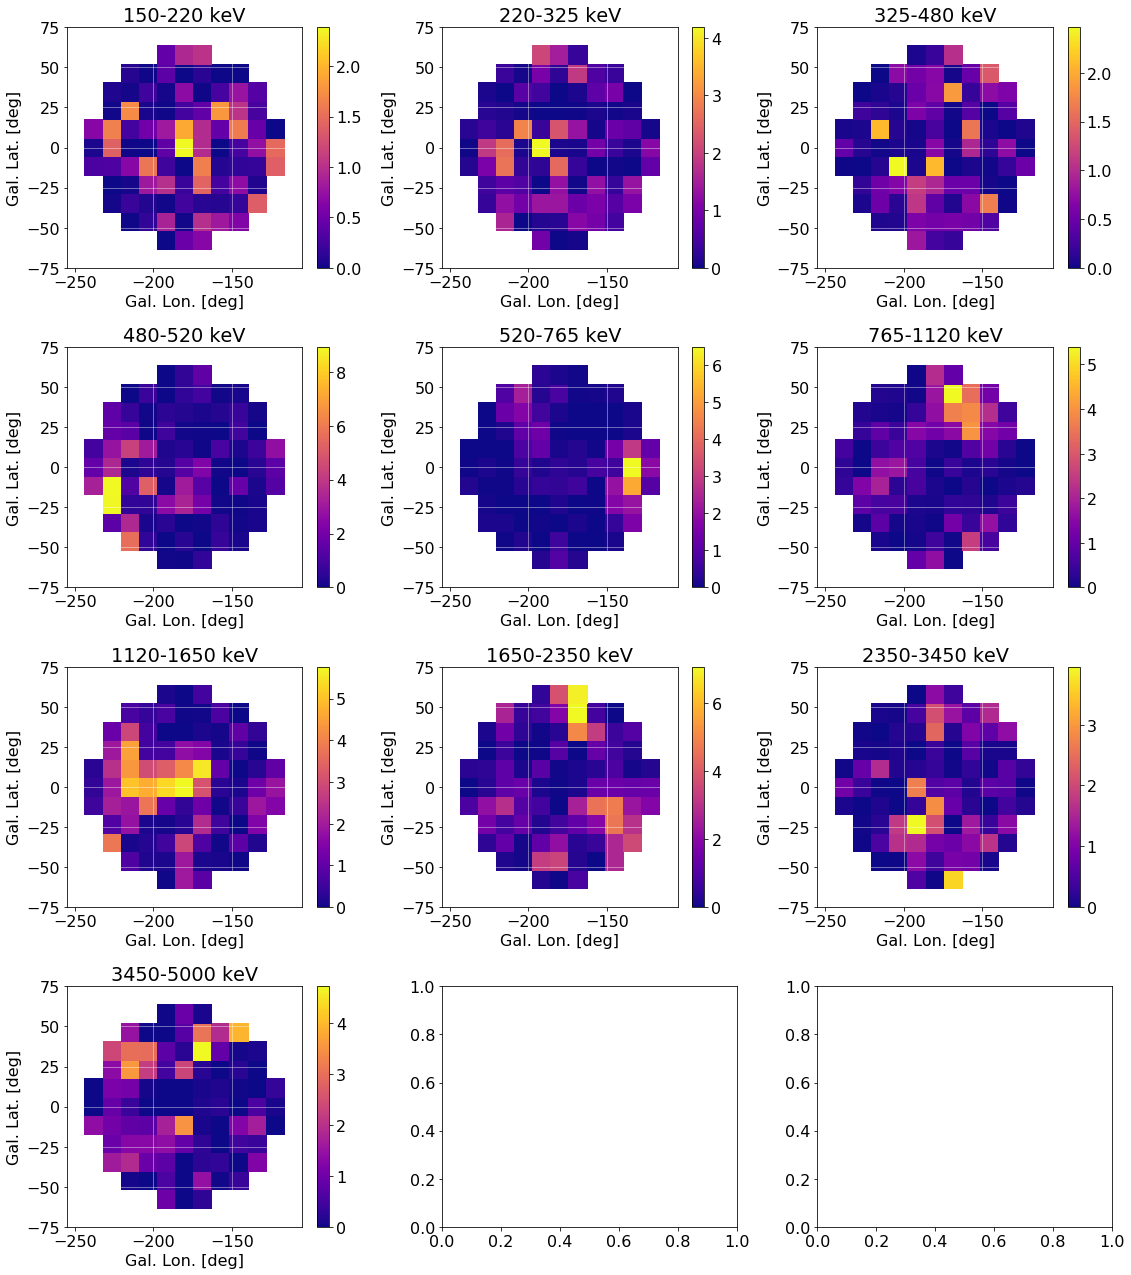

In [111]:
pc = result_d_01.plot_TS_map_results()

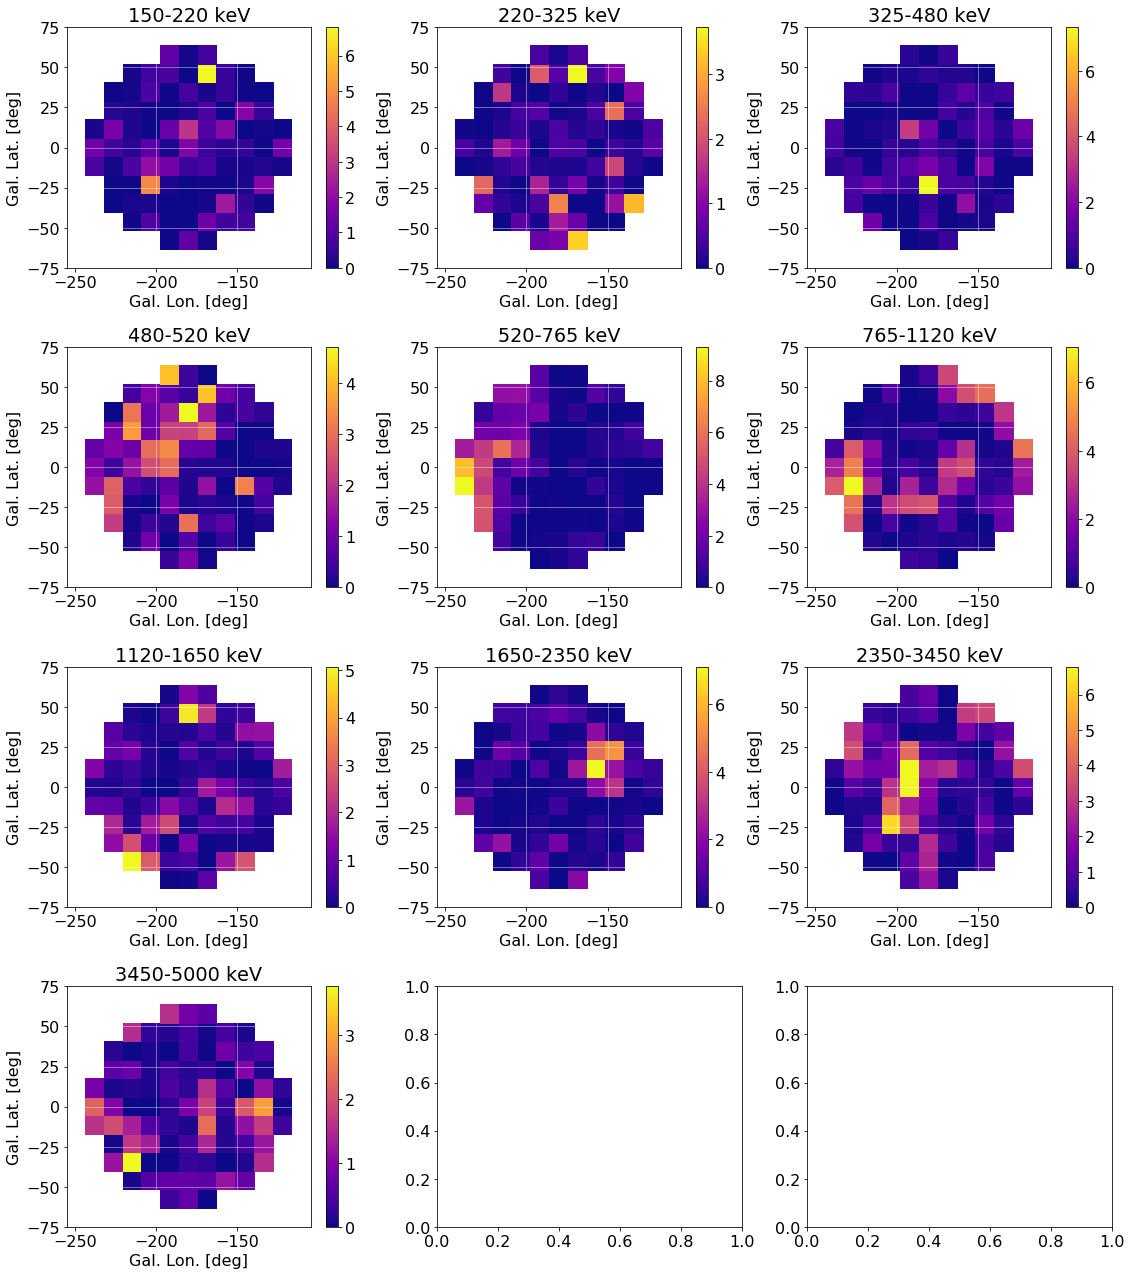

In [114]:
pc = result_r_01.plot_TS_map_results()

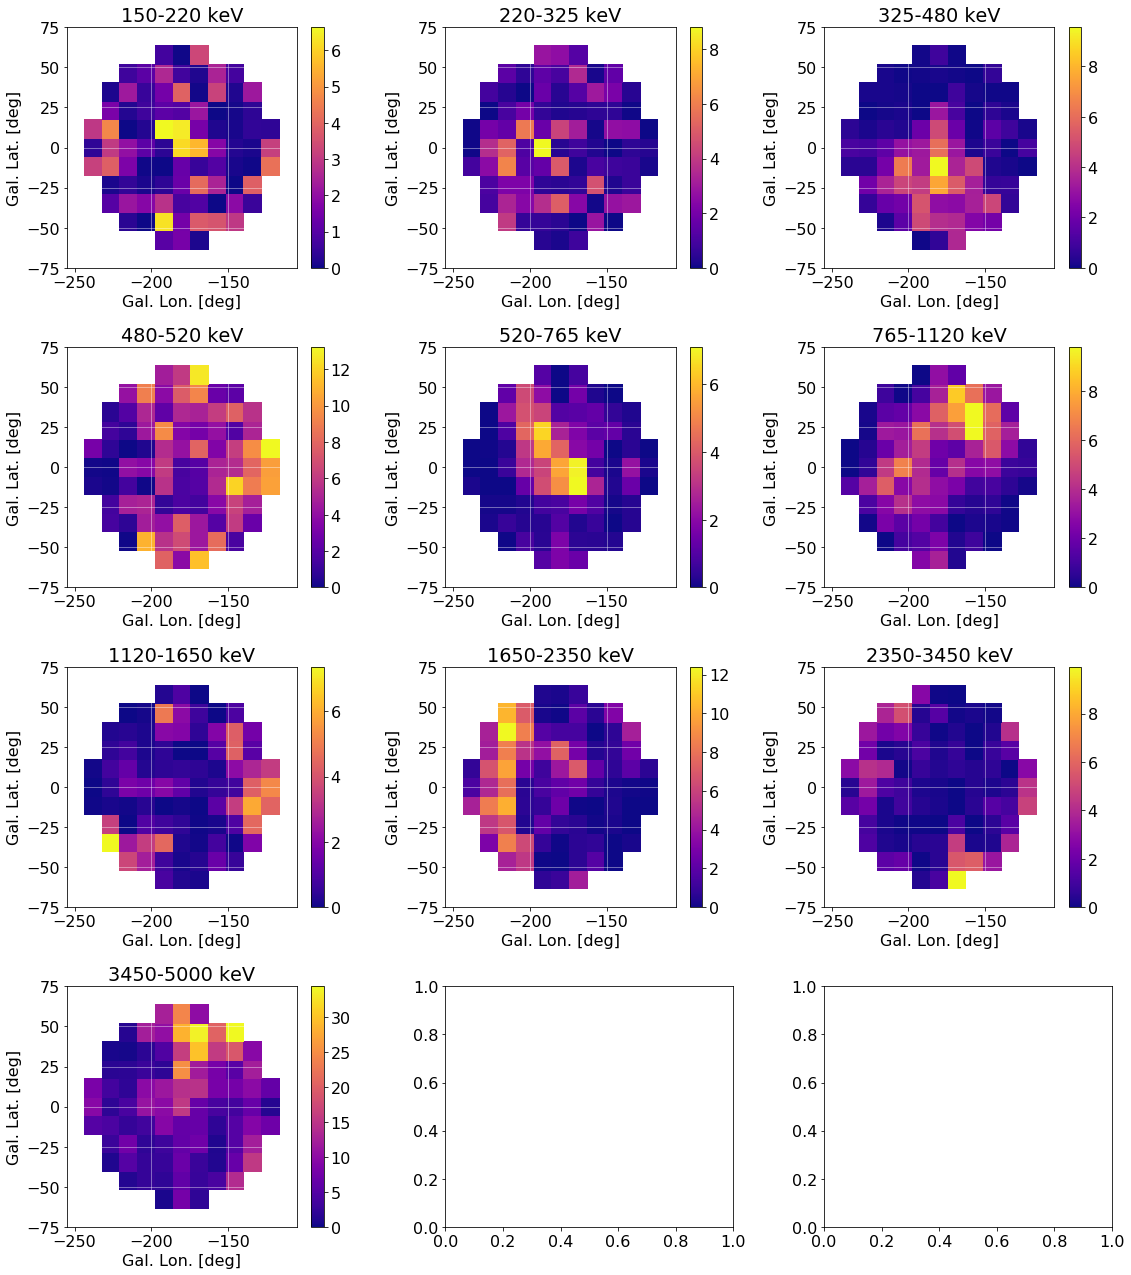

In [115]:
pc = result_dr_01.plot_TS_map_results()

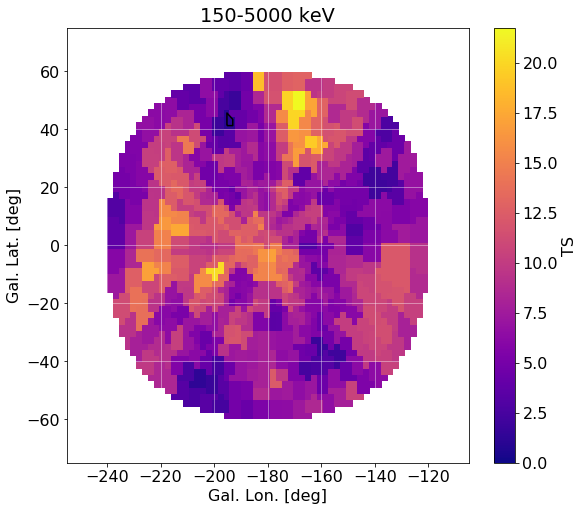

In [348]:
pc = result_d_01.plot_TS_map_results(mode='sum')

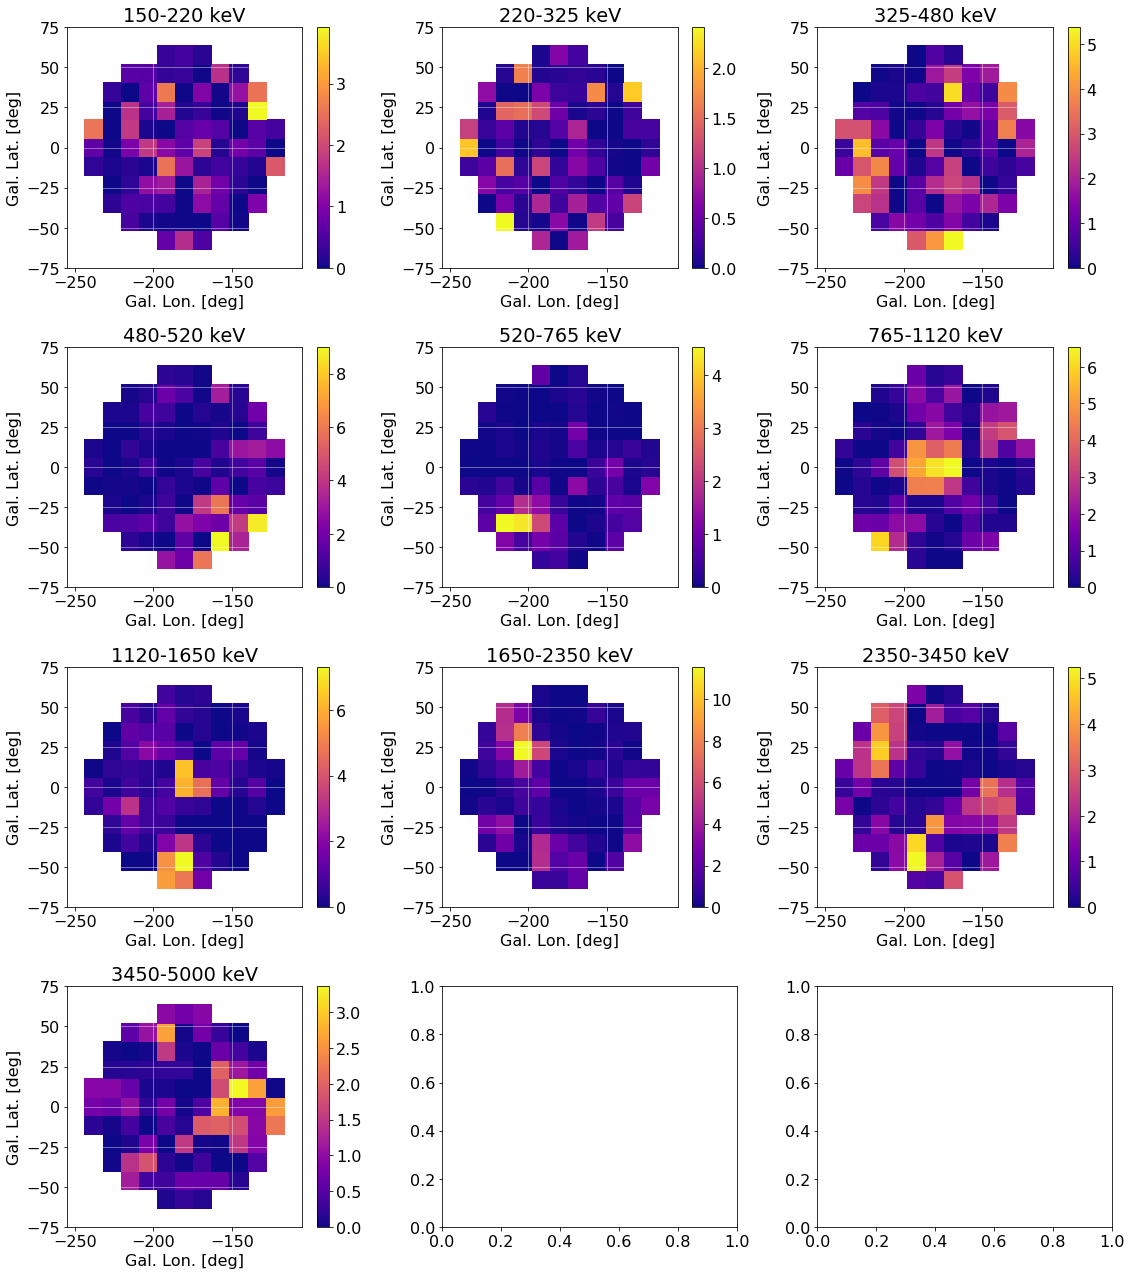

In [276]:
pc = result_d_13.plot_TS_map_results()#l_src=[l1],b_src=[b1])
#pc.ravel()[2].plot(pointing_a1.zpoins[:,0],pointing_a1.zpoins[:,1],'.')
#pc.ravel()[2].set_xlim(l_gridg[0],l_gridg[-1])

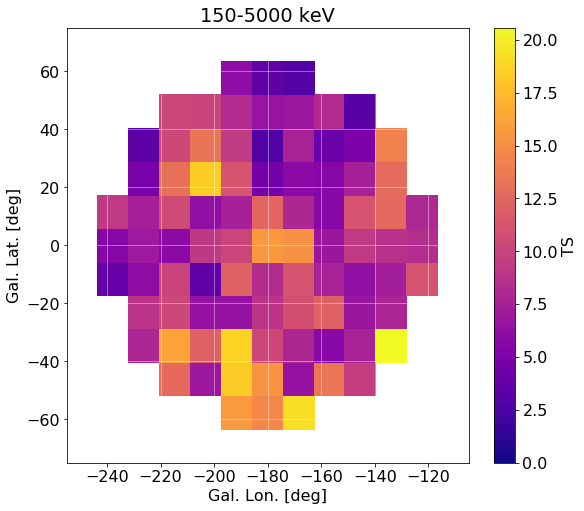

In [277]:
pc = result_d_13.plot_TS_map_results(mode='sum')

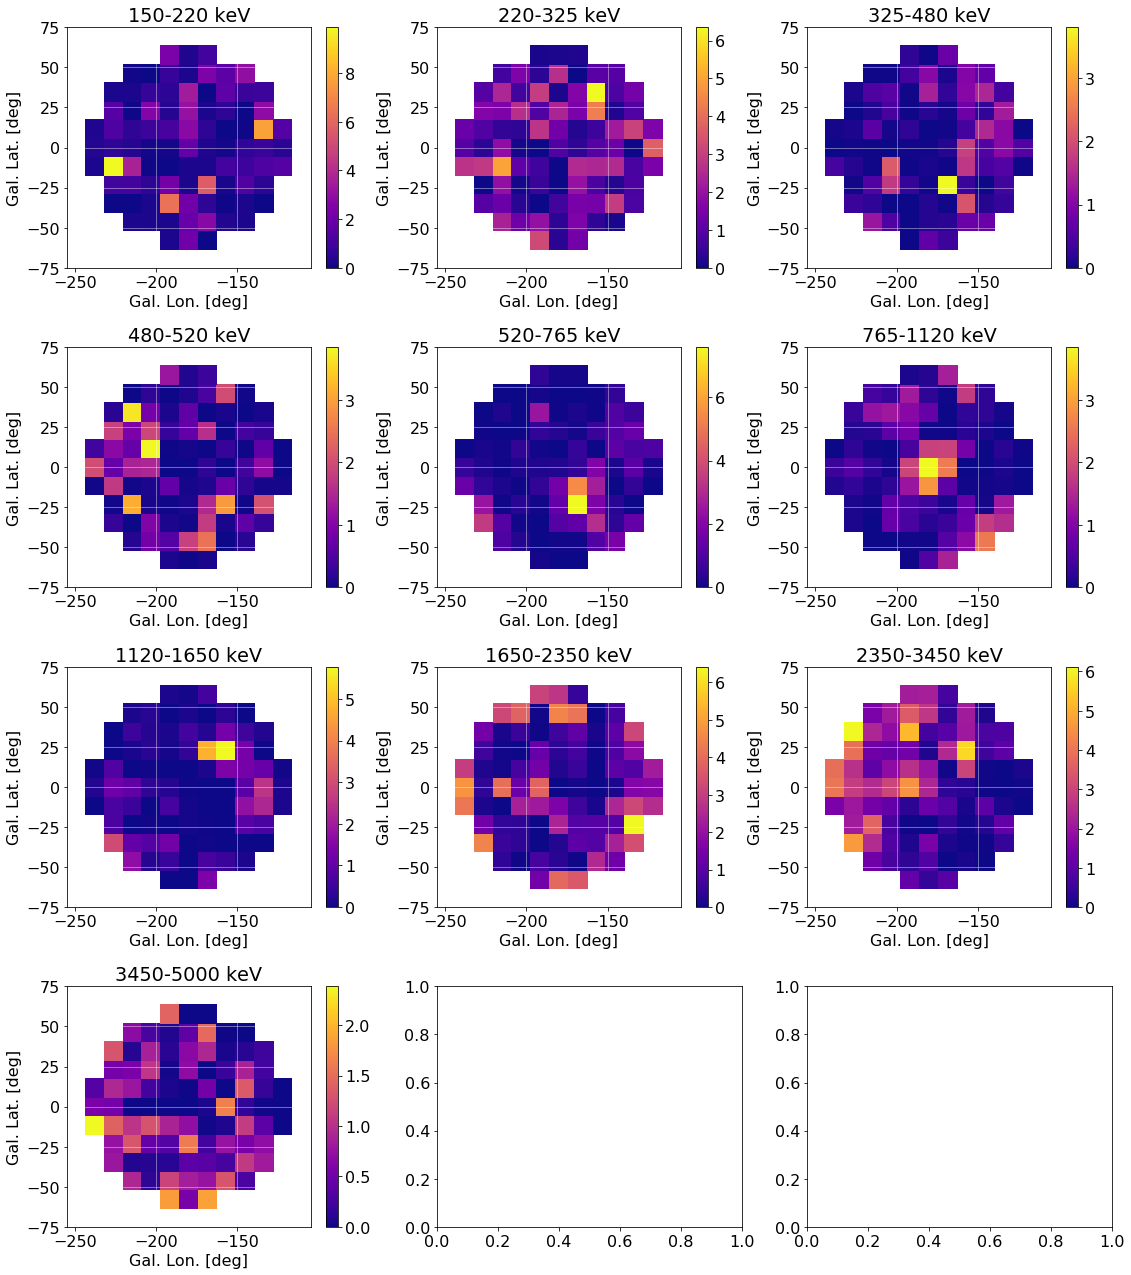

In [283]:
pc = result_d_28.plot_TS_map_results()#l_src=[l1],b_src=[b1])
#pc.ravel()[2].plot(pointing_a1.zpoins[:,0],pointing_a1.zpoins[:,1],'.')
#pc.ravel()[2].set_xlim(l_gridg[0],l_gridg[-1])

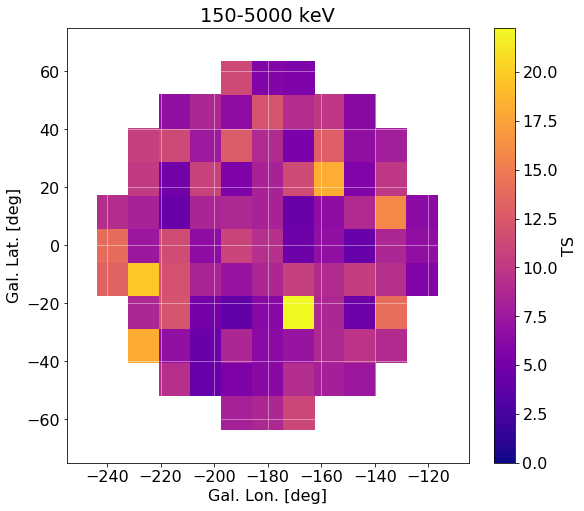

In [284]:
pc = result_d_28.plot_TS_map_results(mode='sum')

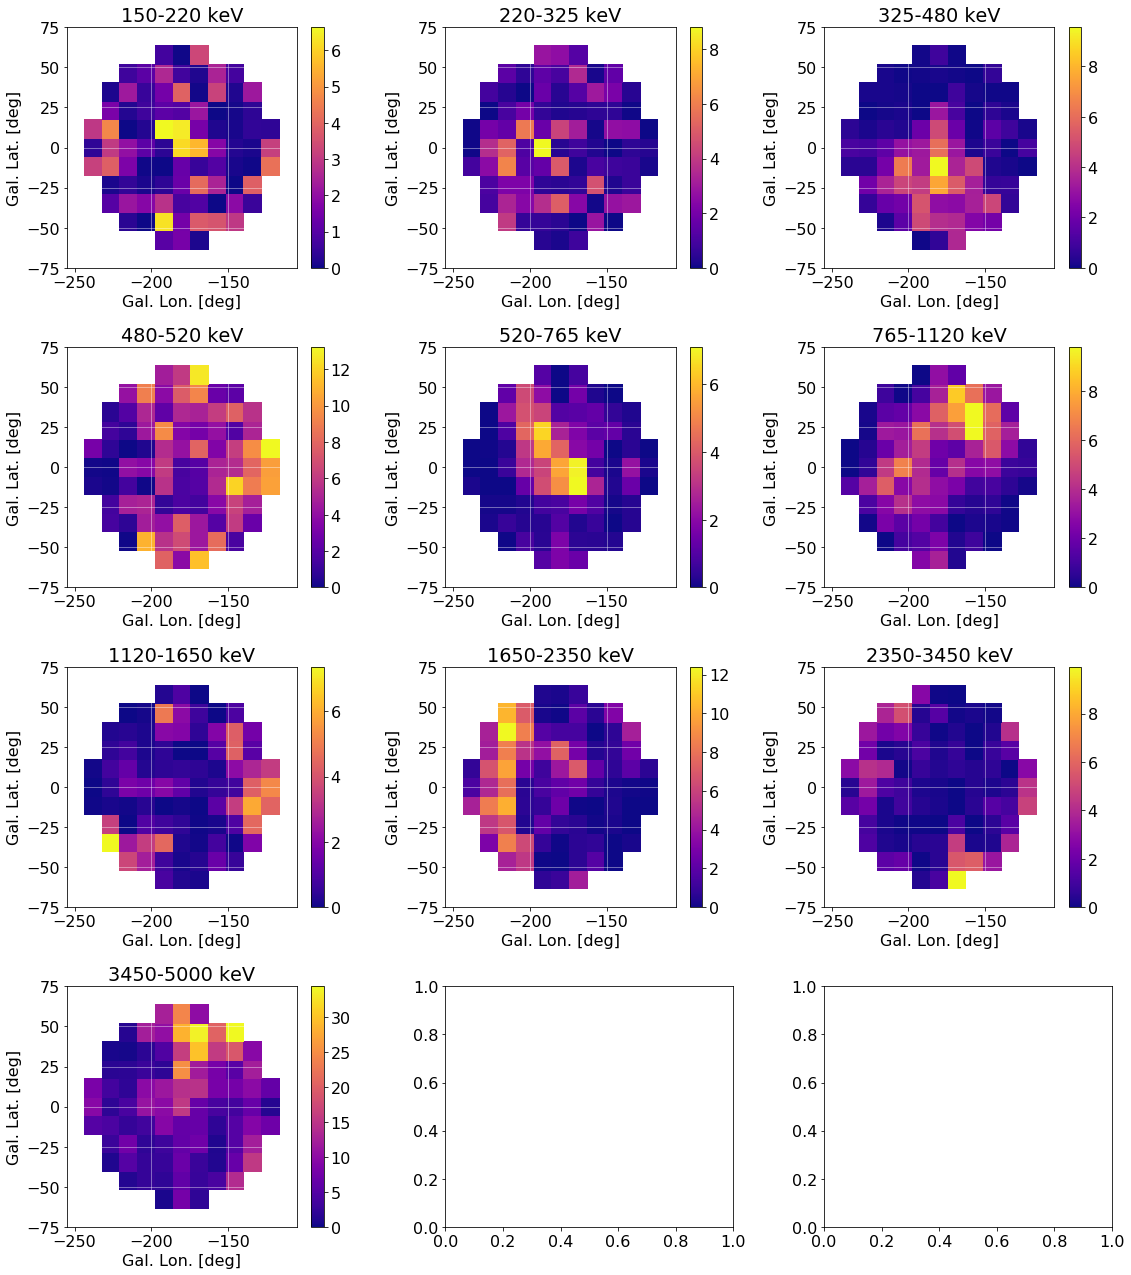

In [336]:
pc = result_r_01.plot_TS_map_results()#l_src=[l1],b_src=[b1])
#pc.ravel()[2].plot(pointing_a1.zpoins[:,0],pointing_a1.zpoins[:,1],'.')
#pc.ravel()[2].set_xlim(l_gridg[0],l_gridg[-1])

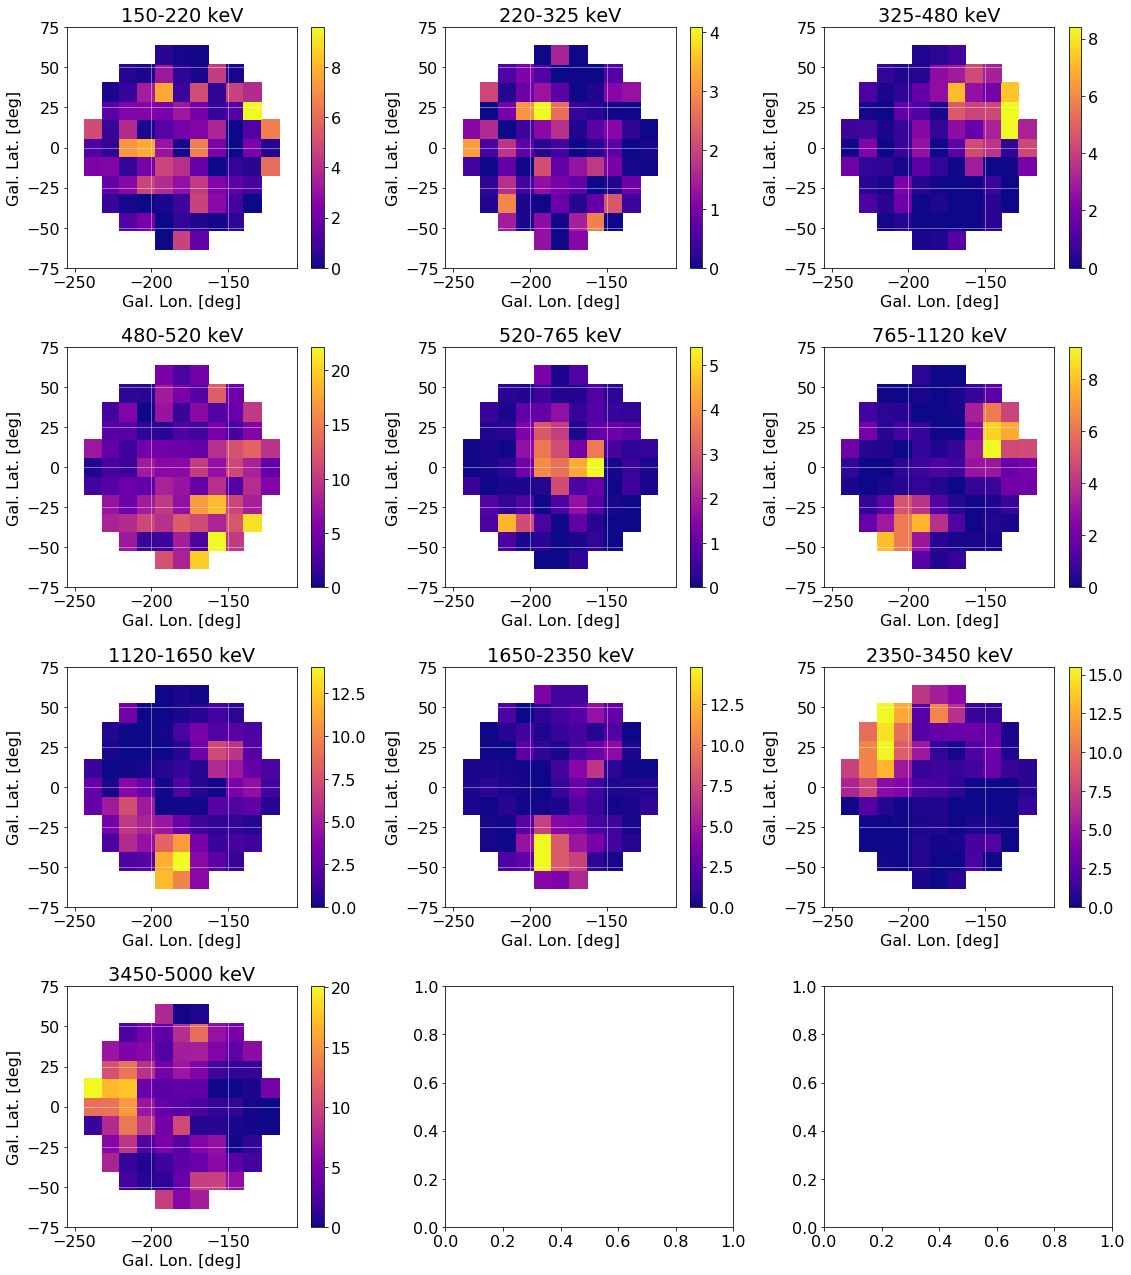

In [342]:
pc = result_r_13.plot_TS_map_results()#l_src=[l1],b_src=[b1])
#pc.ravel()[2].plot(pointing_a1.zpoins[:,0],pointing_a1.zpoins[:,1],'.')
#pc.ravel()[2].set_xlim(l_gridg[0],l_gridg[-1])

In [227]:
Abg_vals = np.array([np.mean(result_d_01.fit_pars[i]['Abg']) for i in range(n_e)])
Abg_errs = np.array([np.std(result_d_01.fit_pars[i]['Abg']) for i in range(n_e)])

In [228]:
1/Abg_vals

array([1.04117525, 1.07359978, 1.02398326, 1.02408405, 1.01897954,
       1.01475529, 1.00388397, 1.00616627, 1.00616285, 1.01649493])

In [229]:
result_d_01.diff_rate[0:9]/np.max(np.abs(result_d_01.diff_rate_err2[0:9,:].T),axis=0)*2

array([1.03696426, 2.09931358, 1.0256319 , 0.92393535, 0.93209123,
       1.25689107, 0.58851039, 0.77970984, 0.66029135])

In [230]:
sky_counts = np.zeros(10)#np.sum(analysis_a1.dataset.binned_data,axis=(0,2,3))
all_counts = np.sum(background_d_01.bg_model,axis=(0,2,3))
bg_counts = all_counts-sky_counts

In [231]:
bg_counts/all_counts

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

(100, 5500)

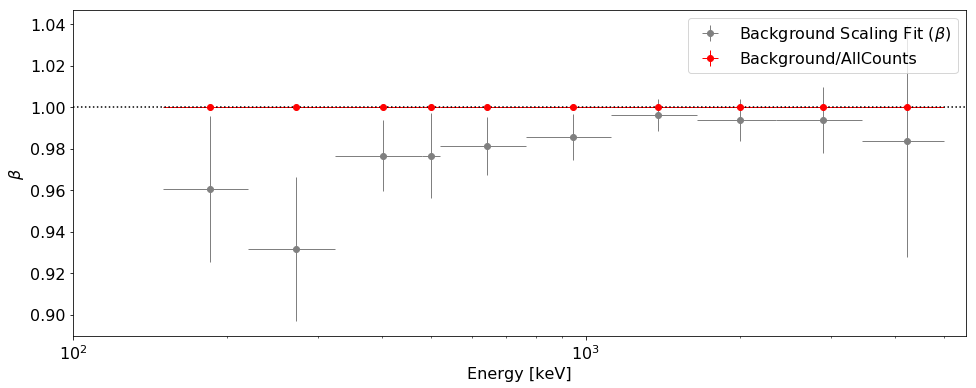

In [232]:
plt.figure(figsize=(16,6))

plt.errorbar(analysis_d_01.dataset.energies.energy_bin_cen[0:],
             Abg_vals,
             xerr=analysis_d_01.dataset.energies.energy_bin_wid[0:],
             yerr=Abg_errs,
             fmt='o',linewidth=1,color='gray',
             label=r'Background Scaling Fit ($\beta$)')

plt.errorbar(analysis_d_01.dataset.energies.energy_bin_cen[0:],
             bg_counts/all_counts,
             xerr=analysis_d_01.dataset.energies.energy_bin_wid[0:],
             yerr=np.zeros(n_e),
             fmt='o',linewidth=1,color='red',
             label=r'Background/AllCounts')

plt.axhline(1,color='black',linestyle=':')

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.ylabel(r'$\beta$')
plt.legend()
plt.xlim(100,5500)

In [755]:
prior_crab = {0: ('truncated_normal_prior',1.5e-6,1e8,0,np.inf,r'$C_0$'),
              1: ('normal_prior',-2.0,5.0,r'$\alpha$'),
              2: ('normal_prior',200,5,r'$E_1$'),
              3: ('normal_prior',20,1,r'$\gamma_1$'),
              4: ('normal_prior',3000,5,r'$E_2$'),
              5: ('normal_prior',20,1,r'$\gamma_2$')}
function = 'hilo_supercutoff_powerlaw'

In [245]:
prior_crab = {0: ('truncated_normal_prior',0,1e8,0,np.inf,r'$C_0$'),
              1: ('normal_prior',-2.0,5.0,r'$\alpha$'),
              2: ('normal_prior',300,50,r'$E_C$')}
function = 'cutoff_powerlaw'

In [259]:
prior_crab = {0: ('truncated_normal_prior',1e-9,1e8,0,np.inf,r'$C_0$'),
              1: ('normal_prior',-2.0,5.0,r'$\alpha$')}
function = 'powerlaw'

In [706]:
prior_crab = {0: ('truncated_normal_prior',1.5e-6,1e8,0,np.inf,r'$C_0$'),
              1: ('normal_prior',-2.0,5.0,r'$\alpha$'),
              2: ('uniform_prior',199,201,r'$E_{lo}$'),
              3: ('uniform_prior',2999,3001,r'$E_{hi}$')}
function = 'powerlaw_boxcar'

In [242]:
result_b1.diff_rate/np.max(np.abs(result_b1.diff_rate_err2),axis=1)

NameError: name 'result_b1' is not defined

In [260]:
result_d_01.fit_spectrum(function,prior_crab,e_select=np.arange(10))

  4%|▍         | 77/2000 [00:00<00:02, 769.86it/s]

Fitting spectrum ... with some info included here ...


100%|██████████| 2000/2000 [00:02<00:00, 837.47it/s]


Processing took 2.4 seconds


Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
    $C_0$:  2.13e-05  9.67e-06  2.28e-07  1.08e-05  2.17e-05  3.12e-05  5.15e-05
 $\alpha$: -4.01e+00  8.04e-01 -6.41e+00 -4.65e+00 -4.08e+00 -3.43e+00  1.12e+00


Chi2 (dof): 3.1 (8)


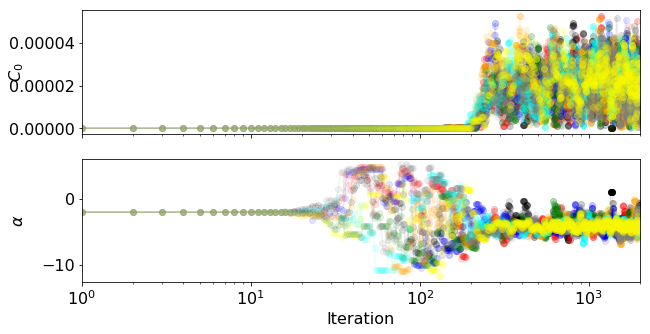

In [261]:
result_d_01.plot_parameter_chains()

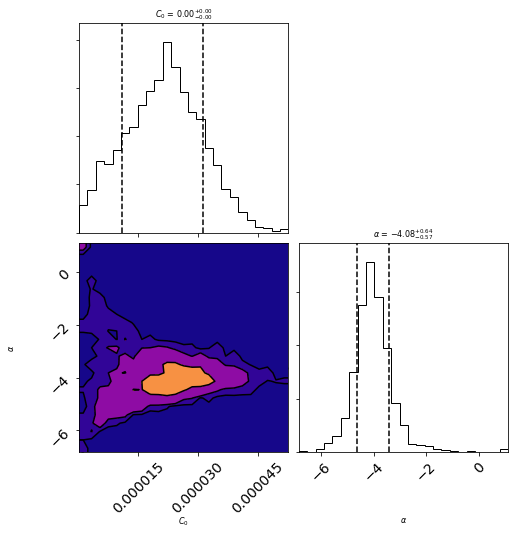

In [262]:
result_d_01.corner_plot()

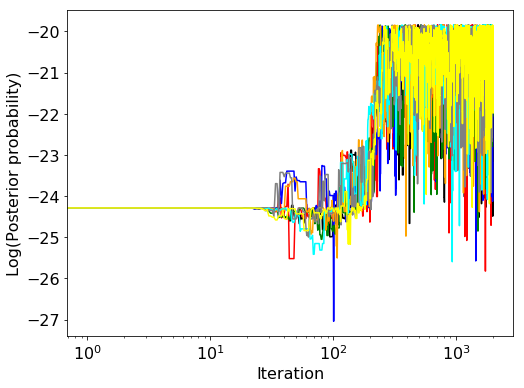

In [263]:
result_d_01.plot_posterior_chains()

In [264]:
result_d_01.calculate_model_posteriors()

14000 16000


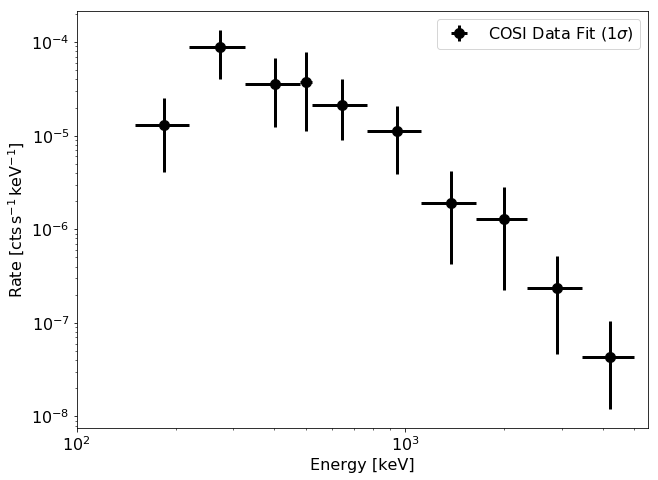

In [265]:
result_d_01.plot_extracted_spectrum()

(1e-08, 0.00027686722512673104)

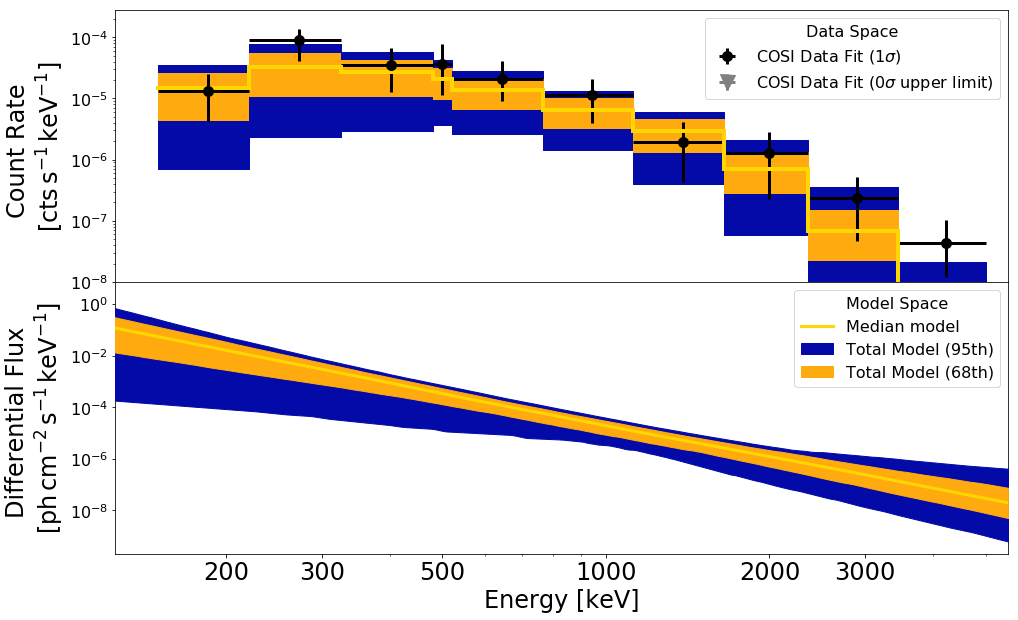

In [266]:
pc = result_d_01.plot_posterior_spectrum(model_mode='flux',ul=0)
pc[0].set_ylim(1e-8,)

#pc[0].set_xscale('linear')
#pc[1].set_yscale('linear')